
Hi, please take read these rescources.
1. A guide of NDBC data.
https://www.ndbc.noaa.gov/docs/ndbc_web_data_guide.pdf

2. The data of Station 46026 (San Francisco)
https://www.ndbc.noaa.gov/station_history.php?station=46026

3. The desciprtion of features https://www.ndbc.noaa.gov/faq/measdes.shtml

---

# The first part is analyzing the wind data for 7 stations. Only 7 of the 18 stations have records of wind speed, peak gust speed, and sea-level pressure.

## 1. Read the dataset

In [ ]:
import pandas as pd

# List of station IDs
station_ids = [46027, 46244, 46213, 46014, 46013, 46026, 46042,
               46239, 46028, 46011, 46218, 46054, 46053, 46251, 46025,
               46258, 46232]

# Initialize an empty dataframe
df_buoy = pd.DataFrame()

# Base URL
base_url = "https://www.ndbc.noaa.gov/data/stdmet/Sep/{}.txt"

# Loop through each station ID to fetch the data and append to the main dataframe
for station_id in station_ids:
    url = base_url.format(station_id)
    try:
        # Read data from the URL
        temp_df = pd.read_csv(url, delim_whitespace=True, skiprows=[1])

        # You can add a new column to track the station ID if needed
        temp_df['Station_ID'] = station_id

        # Append the data to the main dataframe
        df_buoy = df_buoy.append(temp_df, ignore_index=True)
    except:
        print(f"Failed to fetch data for station ID: {station_id}")

# Display the combined dataframe
df_buoy

<ipython-input-1-f814b20d2e73>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_buoy = df_buoy.append(temp_df, ignore_index=True)
<ipython-input-1-f814b20d2e73>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_buoy = df_buoy.append(temp_df, ignore_index=True)
<ipython-input-1-f814b20d2e73>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_buoy = df_buoy.append(temp_df, ignore_index=True)
<ipython-input-1-f814b20d2e73>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_buoy = df_buoy.append(temp_df, ignore_index=True)
<ipython-input-1-f814b20d2e73>:25: FutureWarning: The frame.append method is deprecated and will be removed 

#YY  MM  DD  hh  mm  WDIR  WSPD   GST   WVHT    DPD    APD  MWD  \
0      2023   9   1   0   0   317   2.1   2.8  99.00  99.00  99.00  999   
1      2023   9   1   0  10   309   2.4   3.3   1.16   8.33   5.54  277   
2      2023   9   1   0  20   304   2.6   3.3  99.00  99.00  99.00  999   
3      2023   9   1   0  30   303   2.0   2.9  99.00  99.00  99.00  999   
4      2023   9   1   0  40   303   1.3   2.0   1.35   7.14   5.93  289   
...     ...  ..  ..  ..  ..   ...   ...   ...    ...    ...    ...  ...   
53207  2023   9  30  21  56   999  99.0  99.0   1.01  10.53   5.59  239   
53208  2023   9  30  22  26   999  99.0  99.0   0.98   9.88   5.83  246   
53209  2023   9  30  22  56   999  99.0  99.0   0.97  10.53   5.32  259   
53210  2023   9  30  23  26   999  99.0  99.0   0.95  11.76   5.69  192   
53211  2023   9  30  23  56   999  99.0  99.0   0.95  11.11   5.81  242   

         PRES   ATMP   WTMP   DEWP   VIS  TIDE  Station_ID  
0      1010.6   14.3   12.0  999.0  99.0  99.0       46027  
1      1010.6   14.2   11.9  999.0  99.0  99.0       46027  
2      1010.5   14.3   11.9  999.0  99.0  99.0       46027  
3      1010.4   14.5   11.9  999.0  99.0  99.0       46027  
4      1010.5   14.7   11.9  999.0  99.0  99.0       46027  
...       ...    ...    ...    ...   ...   ...         ...  
53207  9999.0  999.0  999.0  999.0  99.0  99.0       46232  
53208  9999.0  999.0  999.0  999.0  99.0  99.0       46232  
53209  9999.0  999.0  999.0  999.0  99.0  99.0       46232  
53210  9999.0  999.0  999.0  999.0  99.0  99.0       46232  
53211  9999.0  999.0  999.0  999.0  99.0  99.0       46232  

[53212 rows x 19 columns]

In [ ]:
# Rename columns based on provided descriptions
df_buoy.rename(columns={
    '#YY': 'Year',
    'MM': 'Month',
    'DD': 'Day',
    'hh': 'Hour',
    'mm': 'Minute',
    'WDIR': 'Wind_Direction',
    'WSPD': 'Wind_Speed',
    'GST': 'Peak_Gust_Speed',
    'WVHT': 'Wave_Height',
    'DPD': 'Dominant_Wave_Period',
    'APD': 'Average_Wave_Period',
    'MWD': 'Dominant_Wave_Direction',
    'PRES': 'Sea_Level_Pressure',
    'ATMP': 'Air_Temperature',
    'WTMP': 'Sea_Surface_Temperature',
    'DEWP': 'Dewpoint_Temperature',
    'VIS': 'Station_Visibility',
    'PTDY': 'Pressure_Tendency',
    'TIDE': 'Water_Level'
}, inplace=True)

df_buoy.head()

Year  Month  Day  Hour  Minute  Wind_Direction  Wind_Speed  \
0  2023      9    1     0       0             317         2.1   
1  2023      9    1     0      10             309         2.4   
2  2023      9    1     0      20             304         2.6   
3  2023      9    1     0      30             303         2.0   
4  2023      9    1     0      40             303         1.3   

   Peak_Gust_Speed  Wave_Height  Dominant_Wave_Period  Average_Wave_Period  \
0              2.8        99.00                 99.00                99.00   
1              3.3         1.16                  8.33                 5.54   
2              3.3        99.00                 99.00                99.00   
3              2.9        99.00                 99.00                99.00   
4              2.0         1.35                  7.14                 5.93   

   Dominant_Wave_Direction  Sea_Level_Pressure  Air_Temperature  \
0                      999              1010.6             14.3   
1                      277              1010.6             14.2   
2                      999              1010.5             14.3   
3                      999              1010.4             14.5   
4                      289              1010.5             14.7   

   Sea_Surface_Temperature  Dewpoint_Temperature  Station_Visibility  \
0                     12.0                 999.0                99.0   
1                     11.9                 999.0                99.0   
2                     11.9                 999.0                99.0   
3                     11.9                 999.0                99.0   
4                     11.9                 999.0                99.0   

   Water_Level  Station_ID  
0         99.0       46027  
1         99.0       46027  
2         99.0       46027  
3         99.0       46027  
4         99.0       46027

## 2. Handle the missing value

In [ ]:
import numpy as np

# Define the missing value patterns
missing_patterns = [99.00, 999, 999.0, 99.0]

# Loop through each column and replace each pattern with NaN
for column in df_buoy.columns:
    for pattern in missing_patterns:
        df_buoy[column] = df_buoy[column].replace(to_replace=pattern, value=np.nan, regex=True)

missing_data = df_buoy.isnull().sum()
# Display missing data count for each column
print(missing_data)

Year                           0
Month                          0
Day                            0
Hour                           0
Minute                         0
Wind_Direction             10134
Wind_Speed                 10098
Peak_Gust_Speed            10098
Wave_Height                28834
Dominant_Wave_Period       28834
Average_Wave_Period        28834
Dominant_Wave_Direction    28834
Sea_Level_Pressure             0
Air_Temperature            18723
Sea_Surface_Temperature     5932
Dewpoint_Temperature       25289
Station_Visibility         53212
Water_Level                53212
Station_ID                     0
dtype: int64


In [ ]:
# Setting threshold for excessive missing values (e.g., 60%)
threshold = 0.6 * len(df_buoy)

# Drop columns with missing values greater than the threshold
df_buoy.dropna(axis=1, thresh=threshold, inplace=True)

# Drop rows with any missing values
df_buoy.dropna(axis=0, inplace=True)

df_buoy

Year  Month  Day  Hour  Minute  Wind_Direction  Wind_Speed  \
0      2023      9    1     0       0           317.0         2.1   
1      2023      9    1     0      10           309.0         2.4   
2      2023      9    1     0      20           304.0         2.6   
3      2023      9    1     0      30           303.0         2.0   
4      2023      9    1     0      40           303.0         1.3   
...     ...    ...  ...   ...     ...             ...         ...   
50325  2023      9   30    23      10           258.0         7.9   
50326  2023      9   30    23      20           262.0         7.7   
50327  2023      9   30    23      30           262.0         7.5   
50328  2023      9   30    23      40           259.0         7.8   
50329  2023      9   30    23      50           267.0         8.2   

       Peak_Gust_Speed  Sea_Level_Pressure  Air_Temperature  \
0                  2.8              1010.6             14.3   
1                  3.3              1010.6             14.2   
2                  3.3              1010.5             14.3   
3                  2.9              1010.4             14.5   
4                  2.0              1010.5             14.7   
...                ...                 ...              ...   
50325             10.0              1010.6             17.8   
50326             10.0              1010.5             17.9   
50327              9.3              1010.6             17.8   
50328              9.5              1010.5             17.8   
50329             10.0              1010.6             17.9   

       Sea_Surface_Temperature  Station_ID  
0                         12.0       46027  
1                         11.9       46027  
2                         11.9       46027  
3                         11.9       46027  
4                         11.9       46027  
...                        ...         ...  
50325                     19.0       46025  
50326                     19.0       46025  
50327                     19.0       46025  
50328                     19.0       46025  
50329                     19.0       46025  

[30007 rows x 12 columns]

## 3. EDA

In [ ]:
# Creating a unified timestamp column
df_buoy['Timestamp'] = pd.to_datetime(df_buoy[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_buoy.head()

Year  Month  Day  Hour  Minute  Wind_Direction  Wind_Speed  \
0  2023      9    1     0       0           317.0         2.1   
1  2023      9    1     0      10           309.0         2.4   
2  2023      9    1     0      20           304.0         2.6   
3  2023      9    1     0      30           303.0         2.0   
4  2023      9    1     0      40           303.0         1.3   

   Peak_Gust_Speed  Sea_Level_Pressure  Air_Temperature  \
0              2.8              1010.6             14.3   
1              3.3              1010.6             14.2   
2              3.3              1010.5             14.3   
3              2.9              1010.4             14.5   
4              2.0              1010.5             14.7   

   Sea_Surface_Temperature  Station_ID           Timestamp  
0                     12.0       46027 2023-09-01 00:00:00  
1                     11.9       46027 2023-09-01 00:10:00  
2                     11.9       46027 2023-09-01 00:20:00  
3                     11.9       46027 2023-09-01 00:30:00  
4                     11.9       46027 2023-09-01 00:40:00

In [ ]:
print(df_buoy.dtypes)

Year                                int64
Month                               int64
Day                                 int64
Hour                                int64
Minute                              int64
Wind_Direction                    float64
Wind_Speed                        float64
Peak_Gust_Speed                   float64
Sea_Level_Pressure                float64
Air_Temperature                   float64
Sea_Surface_Temperature           float64
Station_ID                          int64
Timestamp                  datetime64[ns]
dtype: object


In [ ]:
# Display summary statistics
print(df_buoy.describe())

          Year    Month           Day          Hour        Minute  \
count  30007.0  30007.0  30007.000000  30007.000000  30007.000000   
mean    2023.0      9.0     15.495184     11.499350     24.990502   
std        0.0      0.0      8.655287      6.920251     17.086662   
min     2023.0      9.0      1.000000      0.000000      0.000000   
25%     2023.0      9.0      8.000000      6.000000     10.000000   
50%     2023.0      9.0     15.000000     12.000000     20.000000   
75%     2023.0      9.0     23.000000     17.000000     40.000000   
max     2023.0      9.0     30.000000     23.000000     50.000000   

       Wind_Direction    Wind_Speed  Peak_Gust_Speed  Sea_Level_Pressure  \
count    30007.000000  30007.000000     30007.000000        30007.000000   
mean       257.975472      4.749418         6.212390         1014.415786   
std         88.768910      3.200995         3.818833            2.648322   
min          1.000000      0.000000         0.000000         1006.200000  

In [ ]:
unique_stations = df_buoy['Station_ID'].unique()
unique_stations

array([46027, 46014, 46042, 46028, 46054, 46053, 46025])

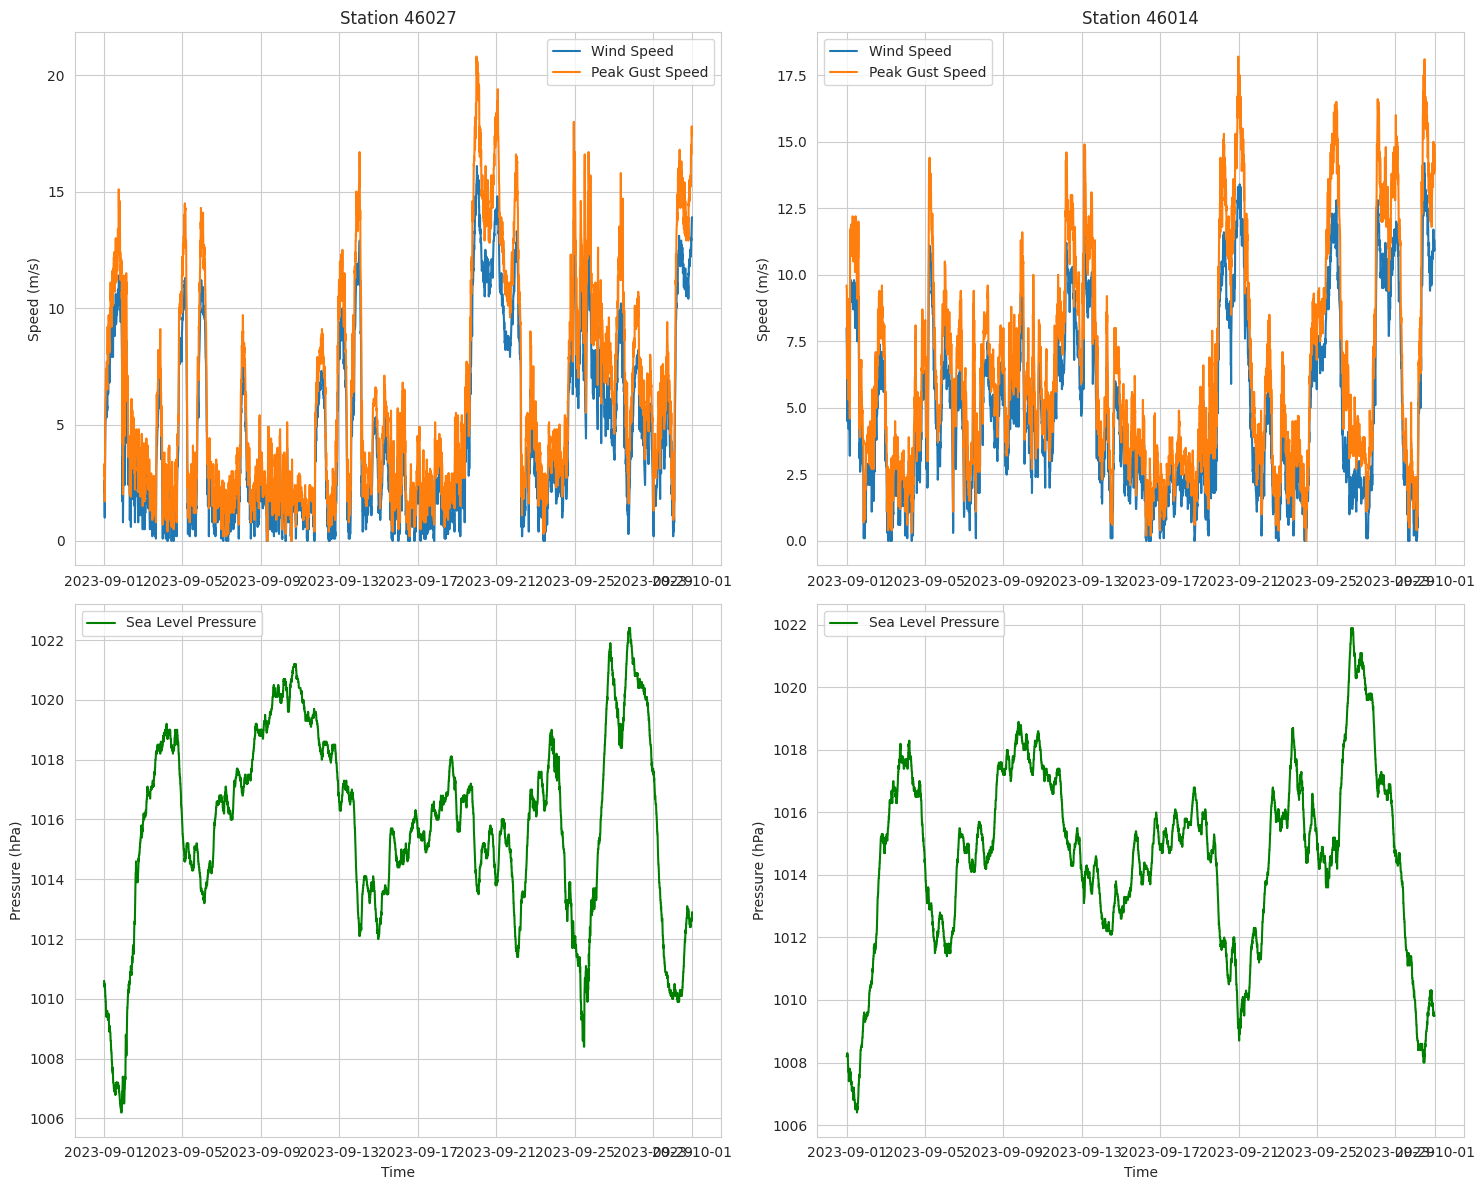

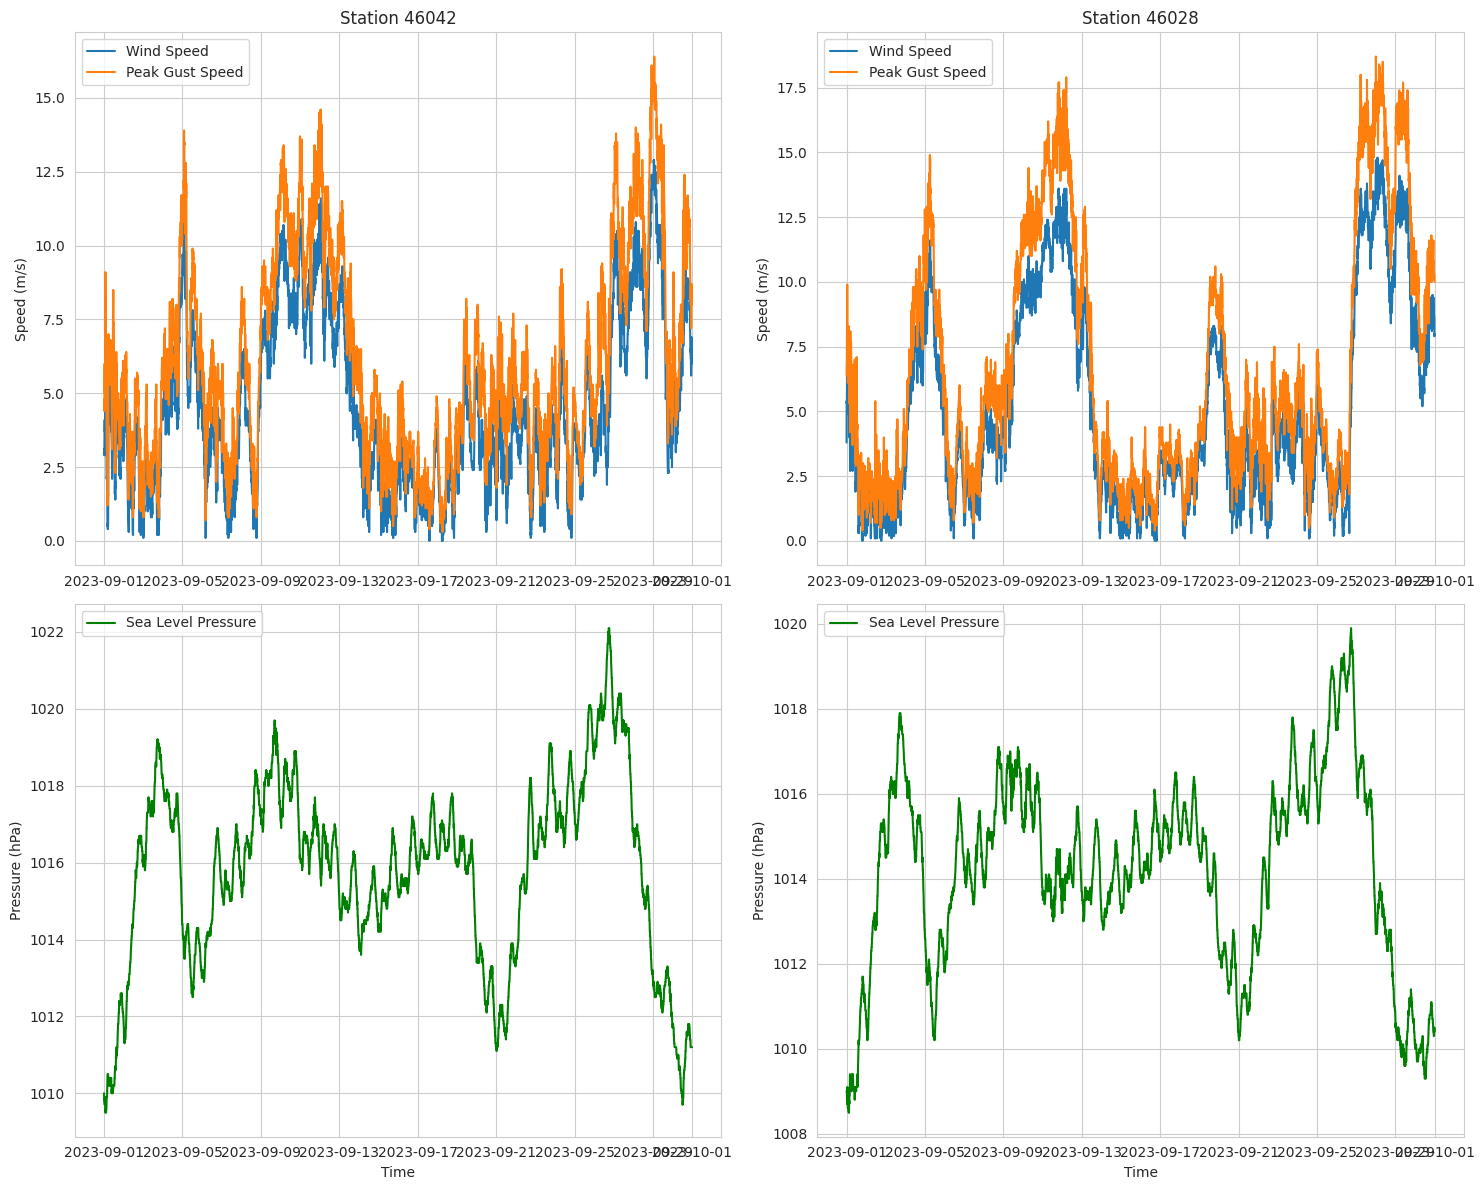

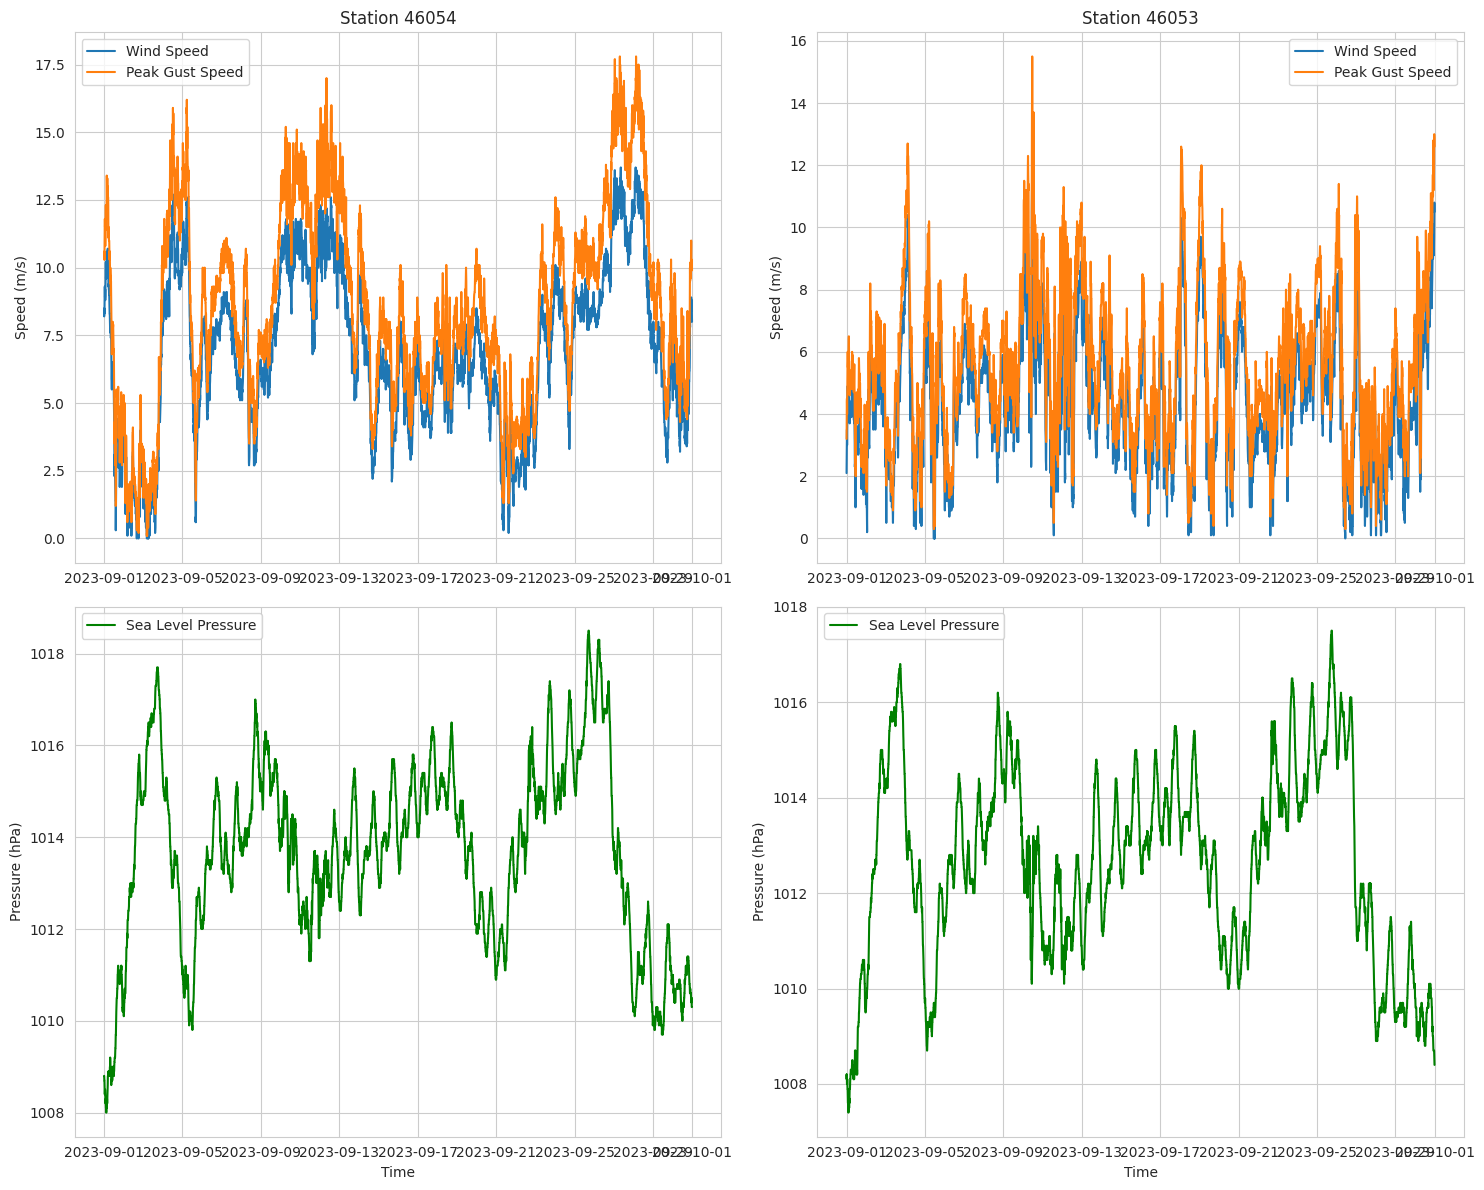

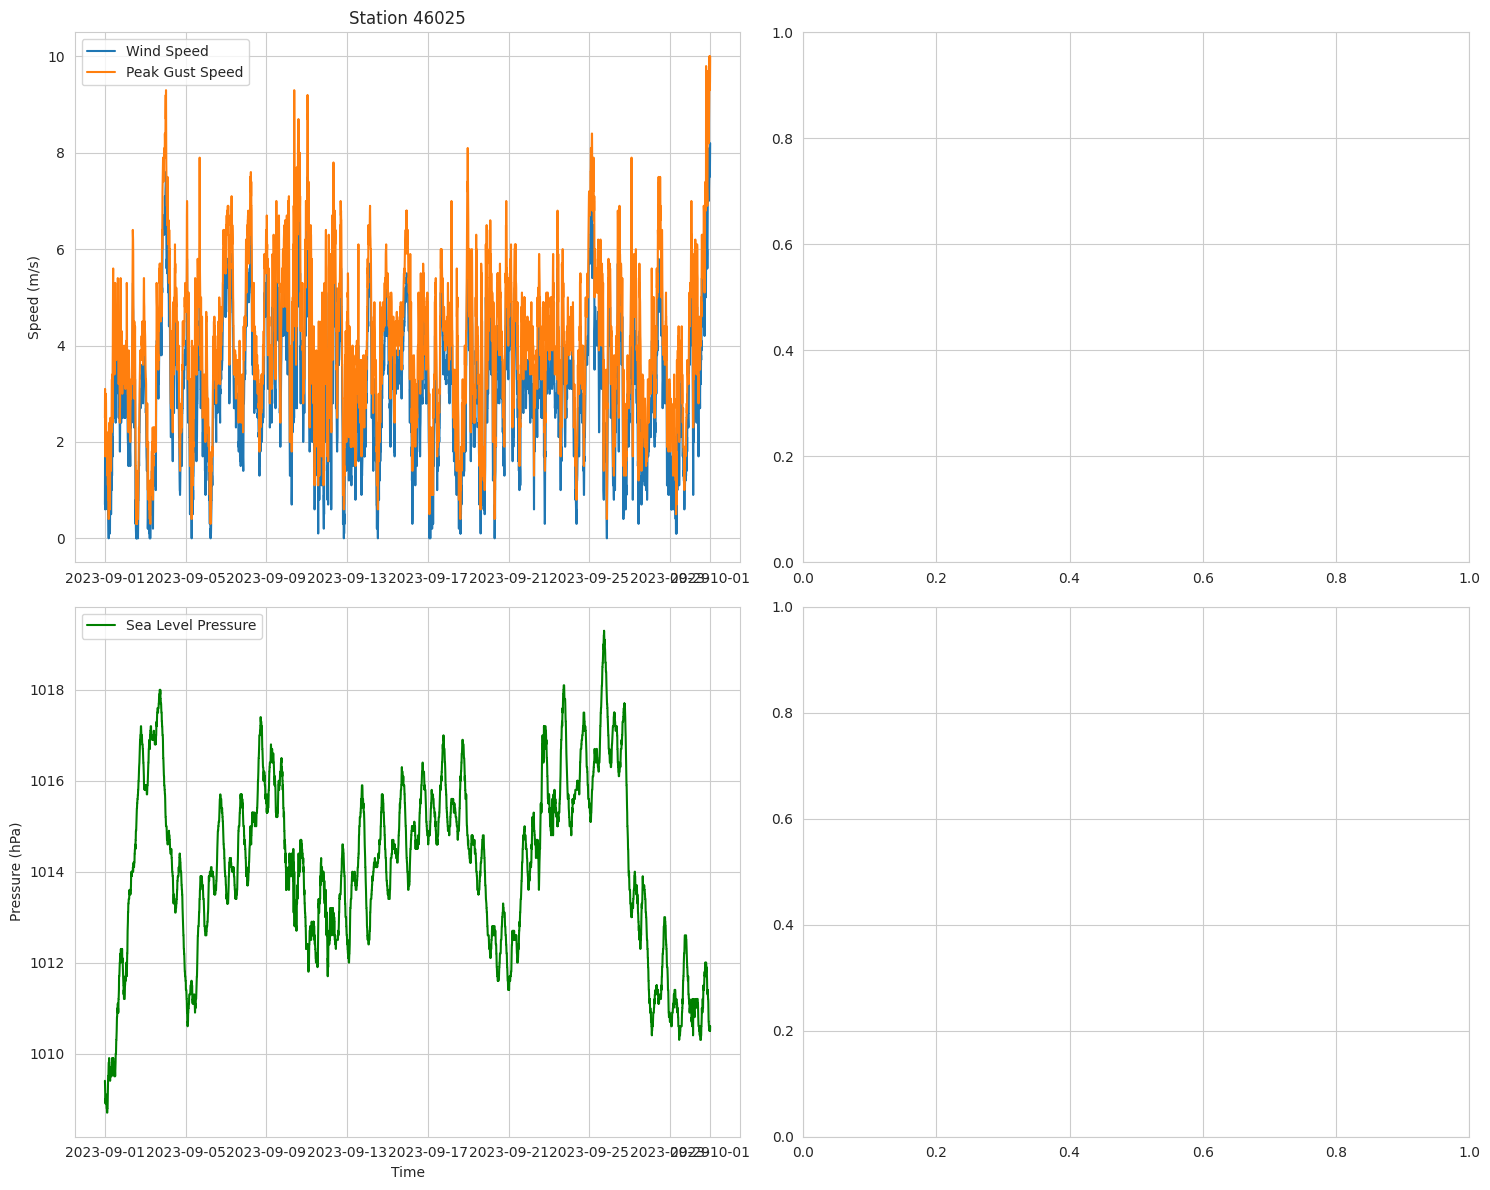

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style
sns.set_style("whitegrid")

# List of unique station IDs
unique_stations = df_buoy['Station_ID'].unique()

# Let's say we want 2 stations per row
num_stations_per_row = 2

for i in range(0, len(unique_stations), num_stations_per_row):
    fig, axes = plt.subplots(2, num_stations_per_row, figsize=(15, 12))

    for j in range(num_stations_per_row):
        if i + j < len(unique_stations):  # Check so we don't go out of bounds
            station = unique_stations[i + j]
            station_data = df_buoy[df_buoy['Station_ID'] == station]

            # First chart: Wind Speed and Peak Gust Speed
            axes[0, j].plot(station_data['Timestamp'], station_data['Wind_Speed'], label='Wind Speed')
            axes[0, j].plot(station_data['Timestamp'], station_data['Peak_Gust_Speed'], label='Peak Gust Speed')
            axes[0, j].set_title(f'Station {station}')
            axes[0, j].set_ylabel('Speed (m/s)')
            axes[0, j].legend()

            # Second chart: Sea Level Pressure
            axes[1, j].plot(station_data['Timestamp'], station_data['Sea_Level_Pressure'], color='green', label='Sea Level Pressure')
            axes[1, j].set_xlabel('Time')
            axes[1, j].set_ylabel('Pressure (hPa)')
            axes[1, j].legend()

    # Display the plots
    plt.tight_layout()
    plt.show()

<ipython-input-10-e48582adf62e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_averages = df_buoy.groupby([df_buoy['Timestamp'].dt.date, 'Station_ID']).mean().reset_index()


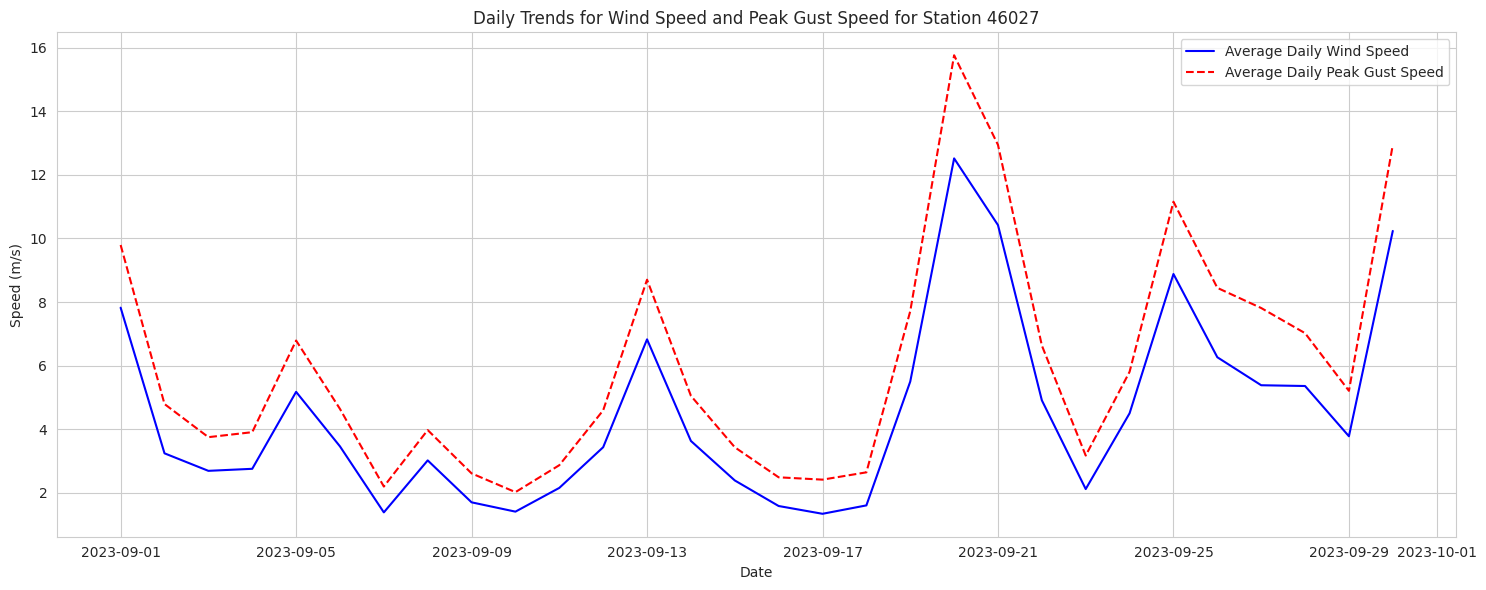

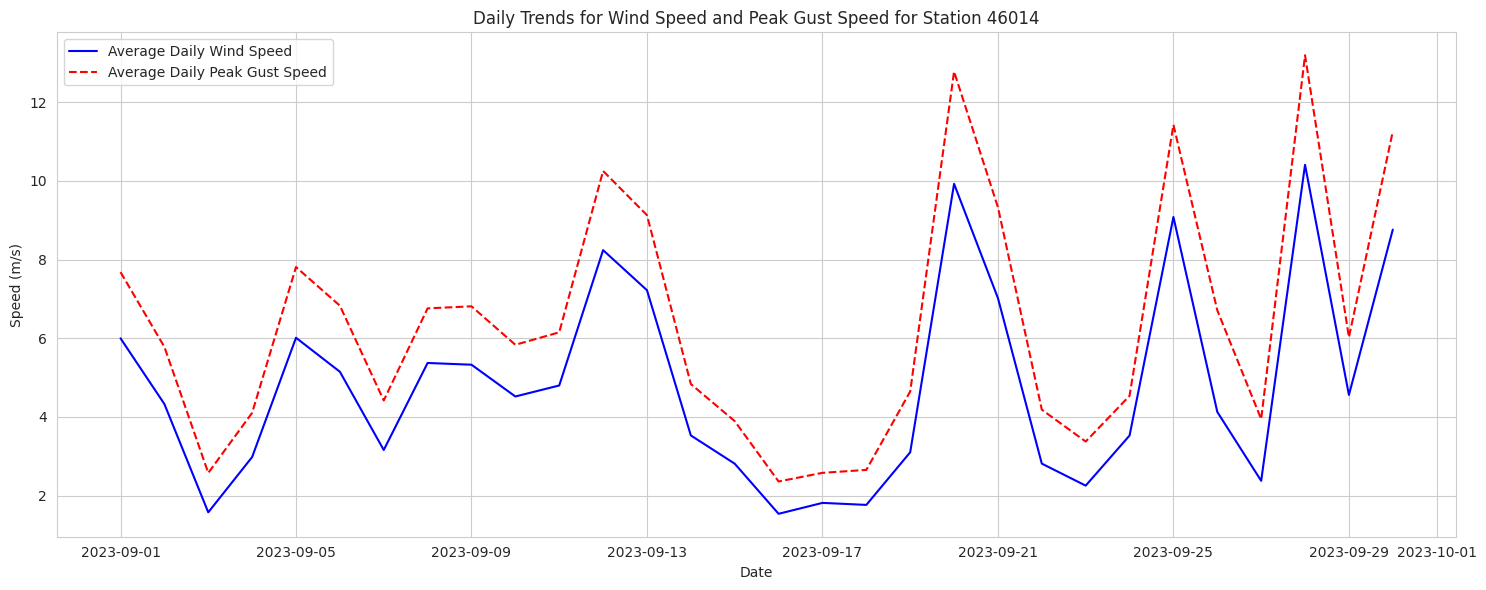

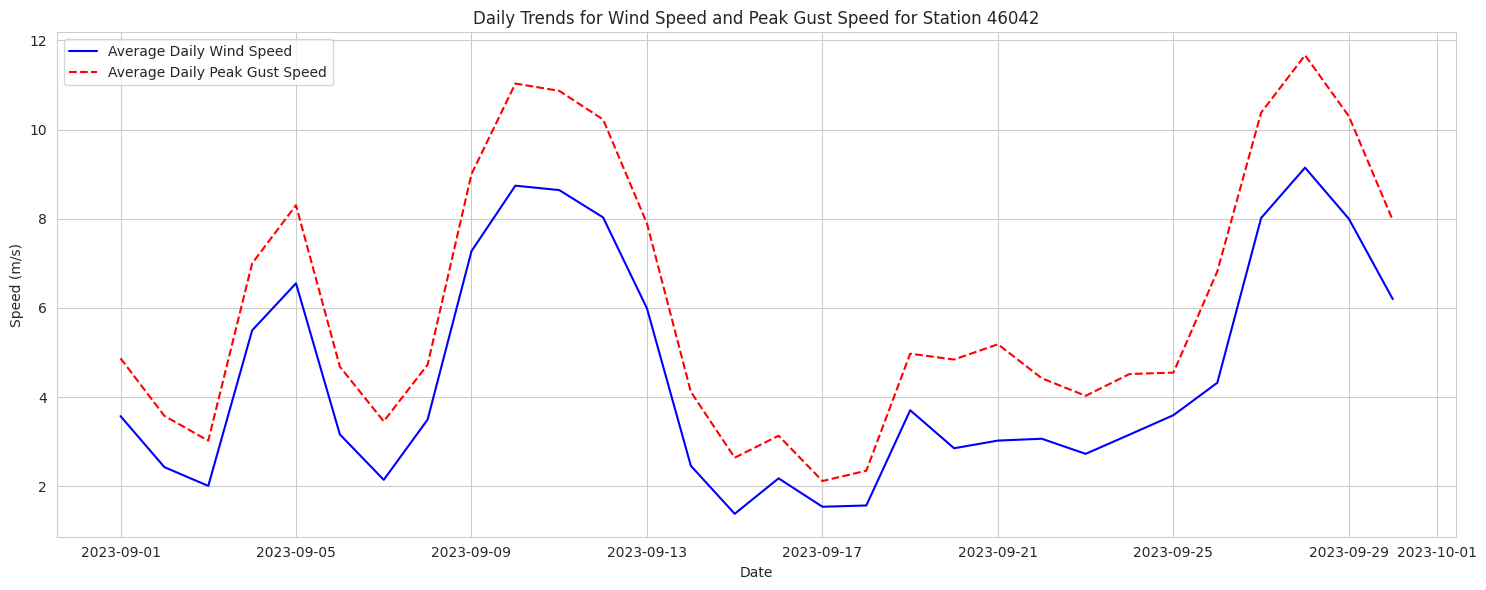

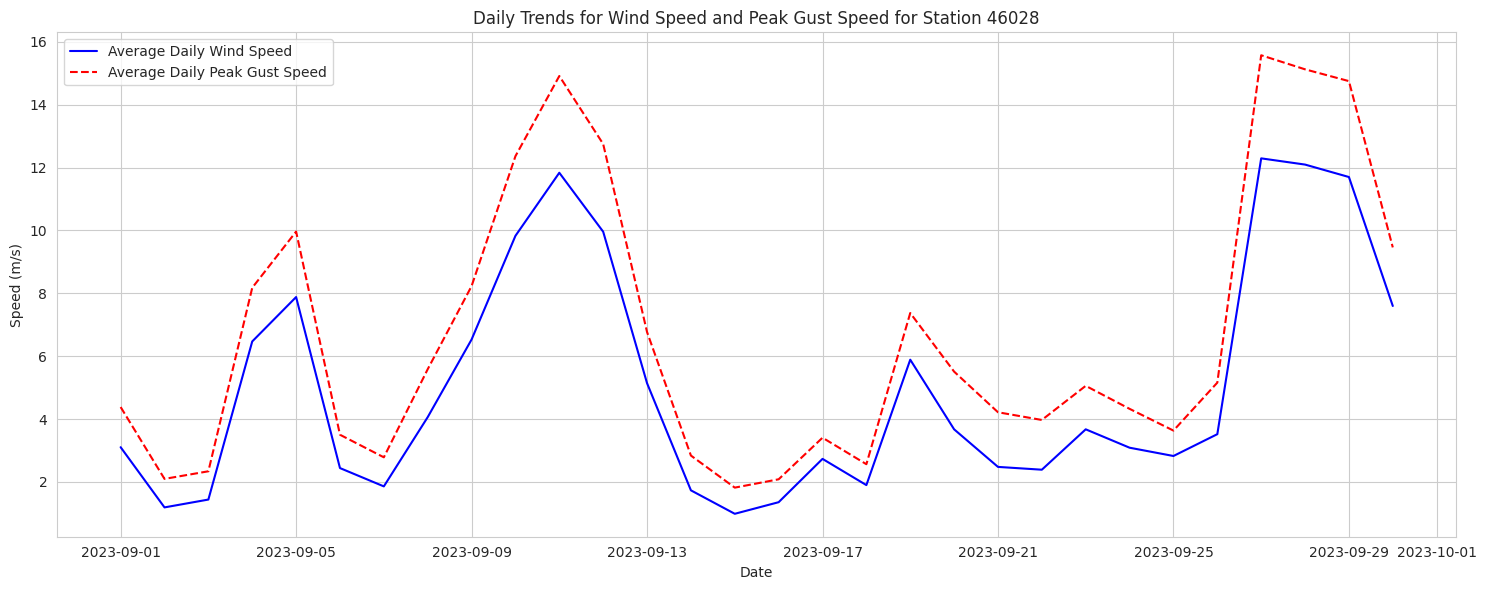

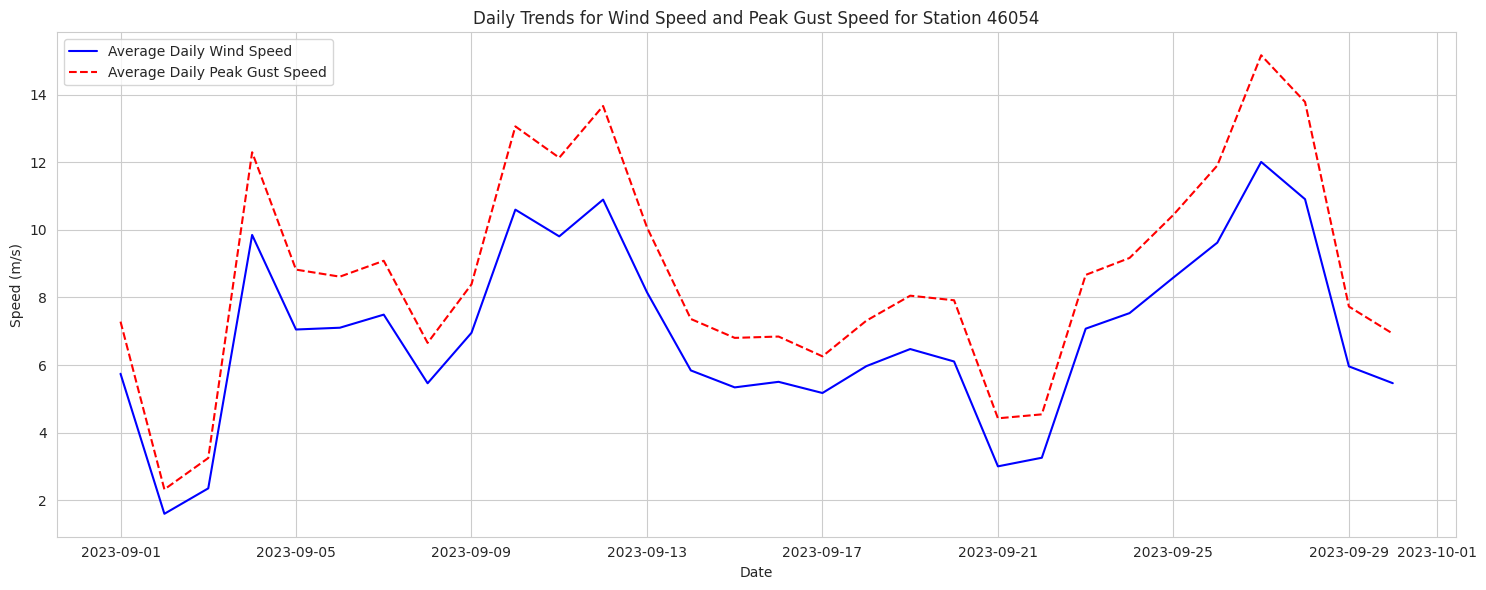

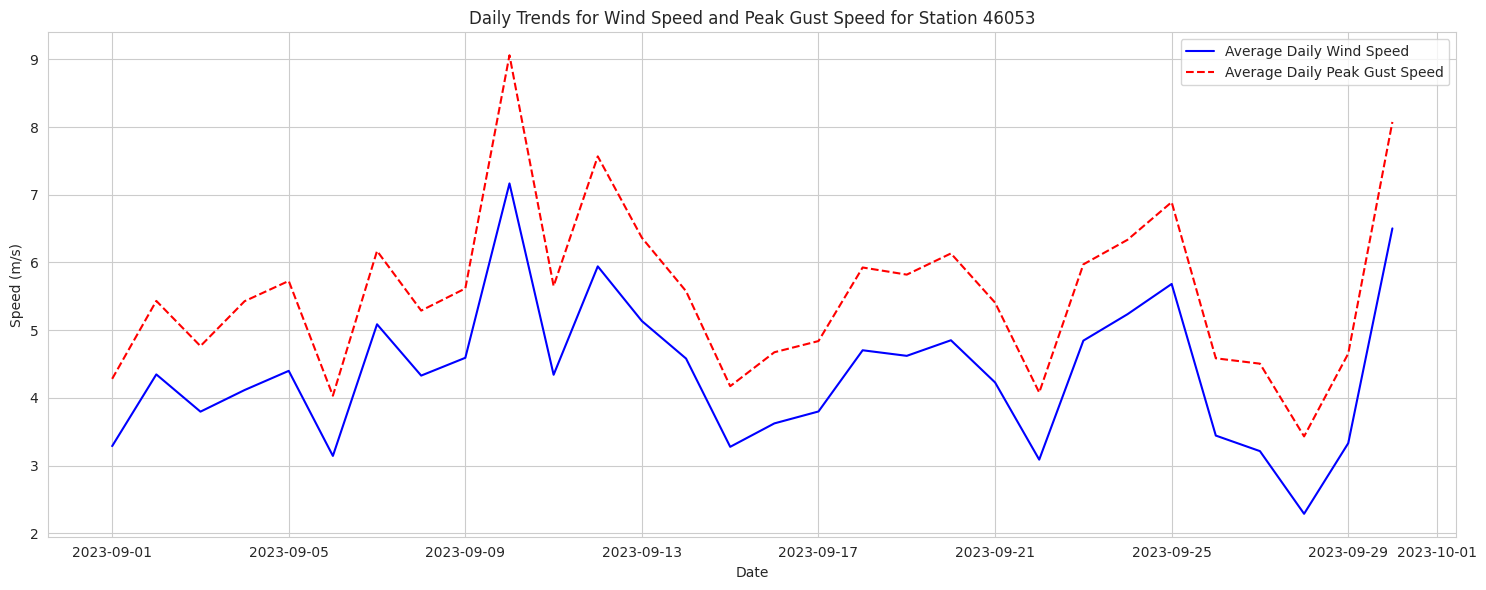

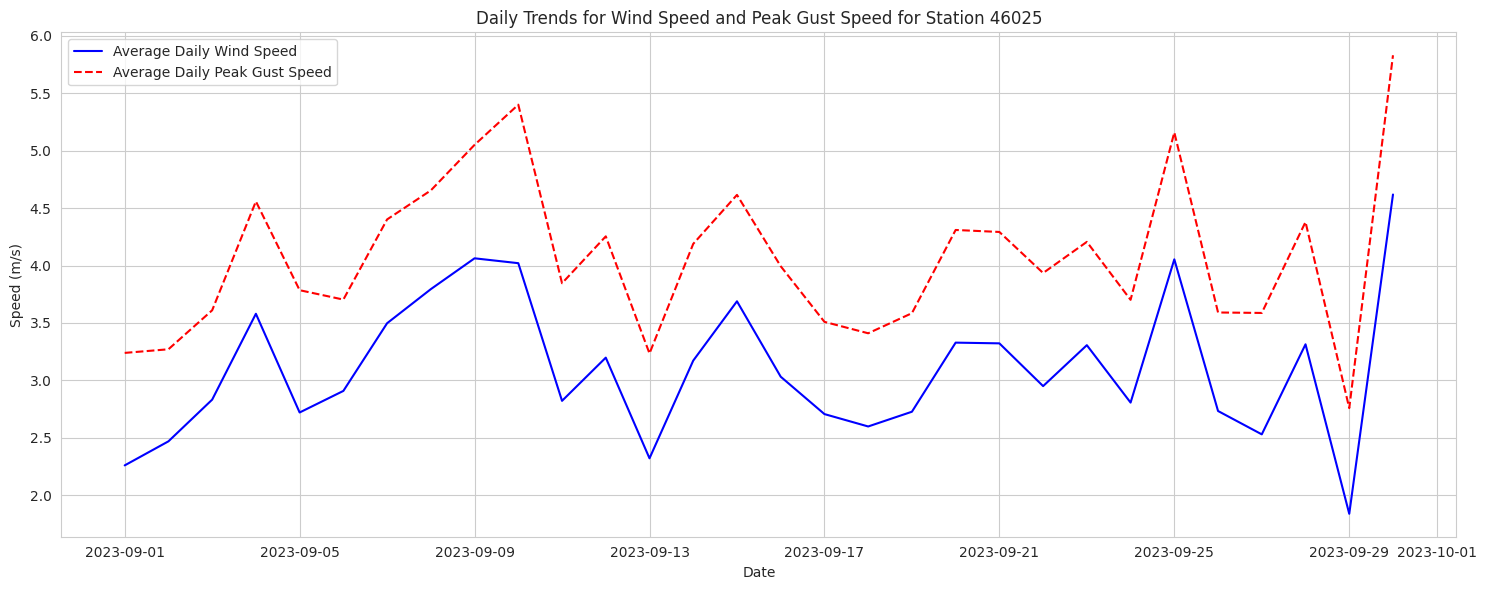

In [ ]:
# Grouping by day and Station_ID, then calculating the mean for each column
daily_averages = df_buoy.groupby([df_buoy['Timestamp'].dt.date, 'Station_ID']).mean().reset_index()

# List of unique station IDs
unique_stations = df_buoy['Station_ID'].unique()

# For each unique station, we'll plot the daily averages
for station in unique_stations:
    station_data = daily_averages[daily_averages['Station_ID'] == station]

    plt.figure(figsize=(15, 6))
    plt.plot(station_data['Timestamp'], station_data['Wind_Speed'], label='Average Daily Wind Speed', color='blue')
    plt.plot(station_data['Timestamp'], station_data['Peak_Gust_Speed'], label='Average Daily Peak Gust Speed', color='red', linestyle='--')
    plt.title(f'Daily Trends for Wind Speed and Peak Gust Speed for Station {station}')
    plt.xlabel('Date')
    plt.ylabel('Speed (m/s)')
    plt.legend()
    plt.tight_layout()
    plt.show()

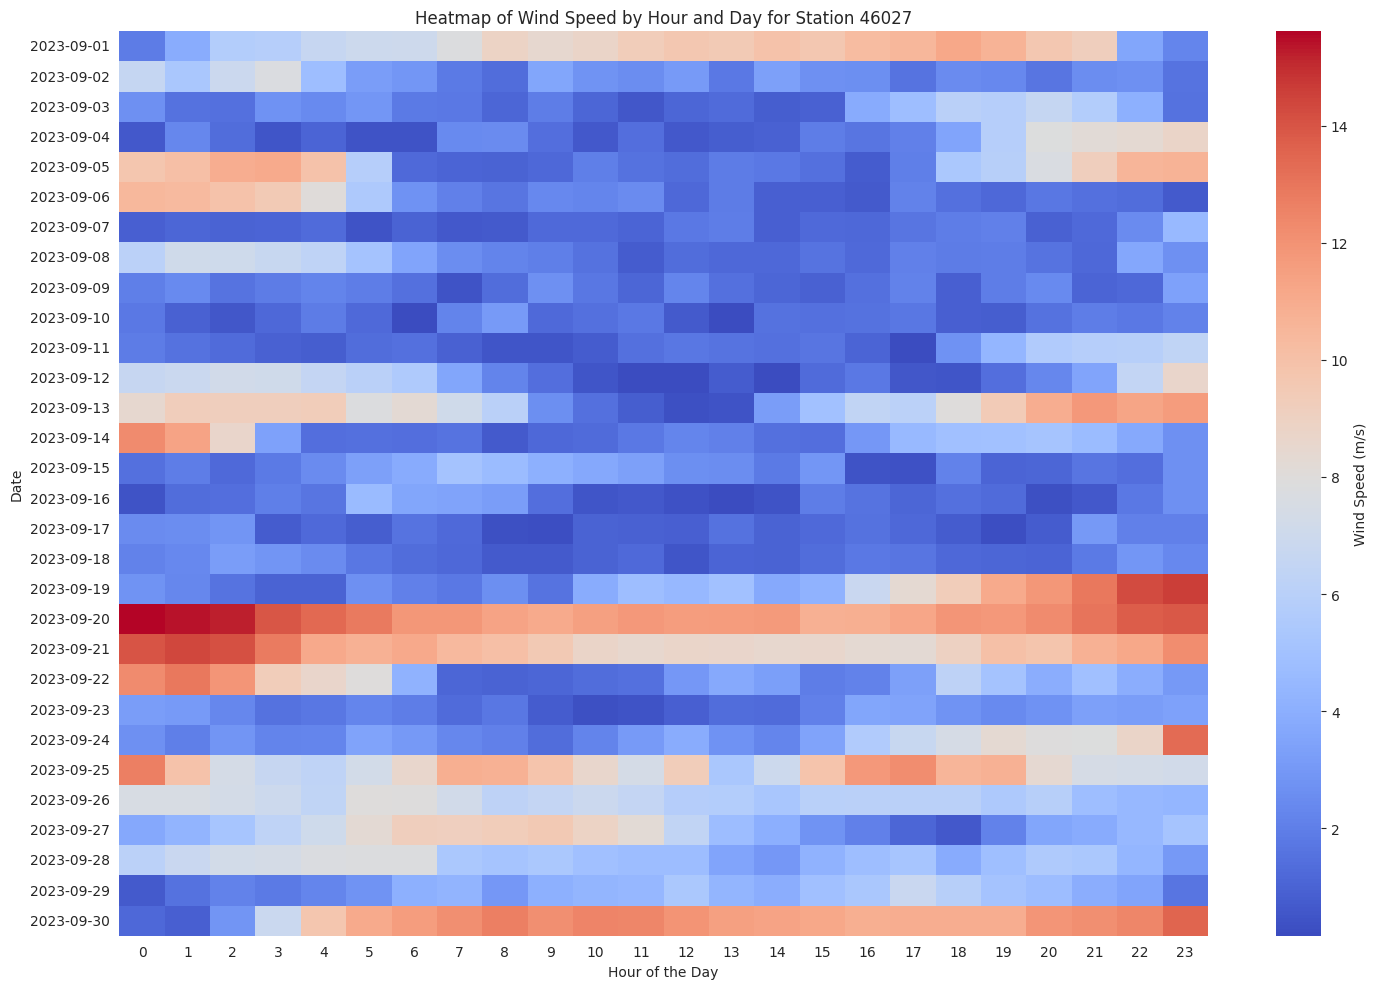

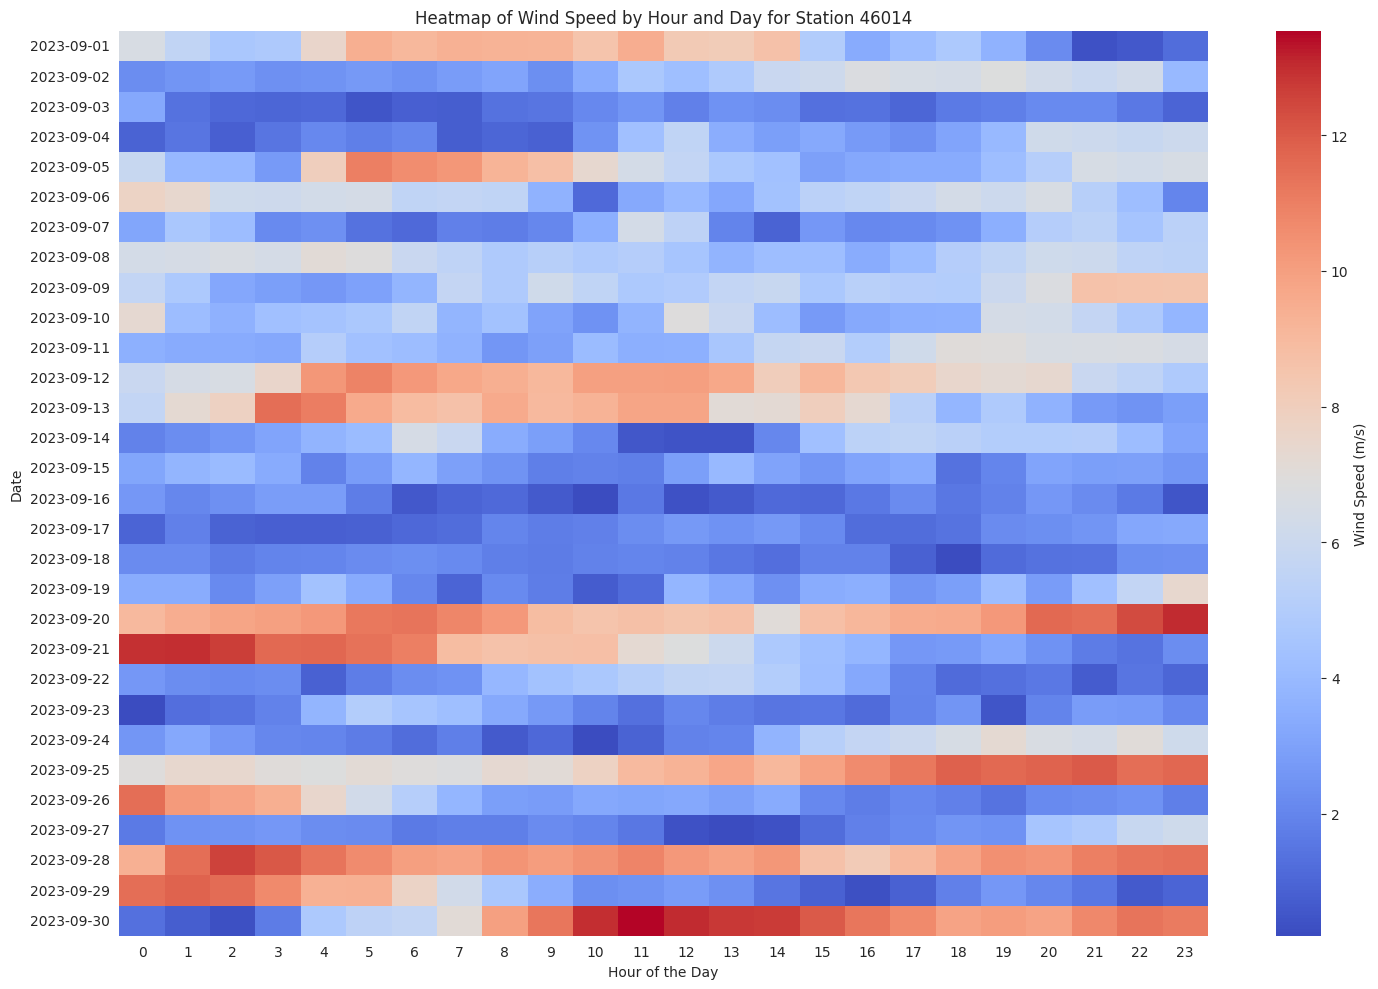

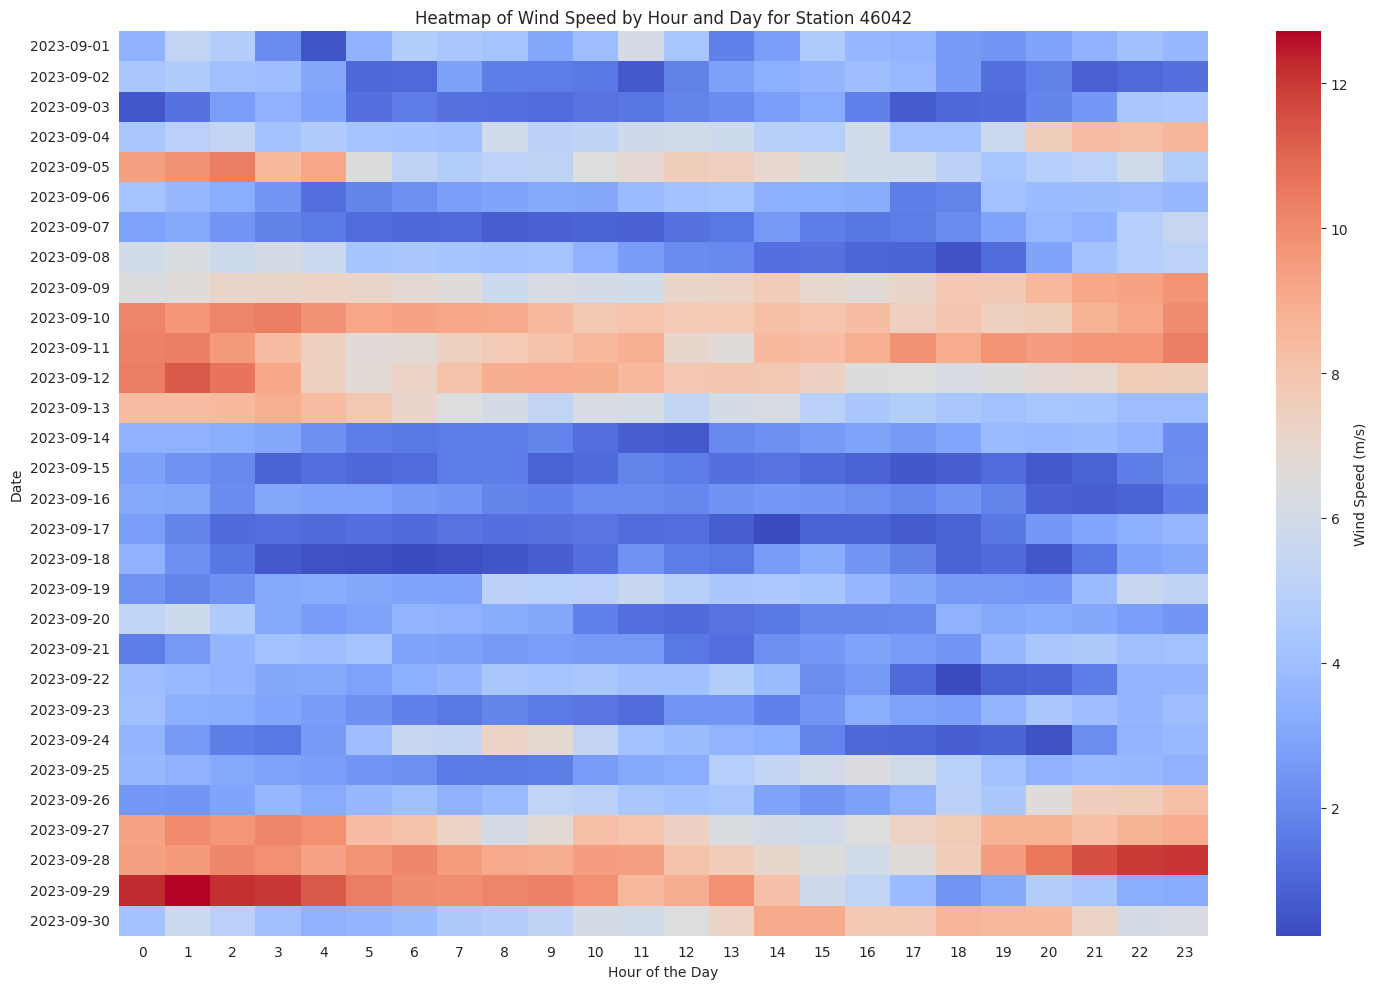

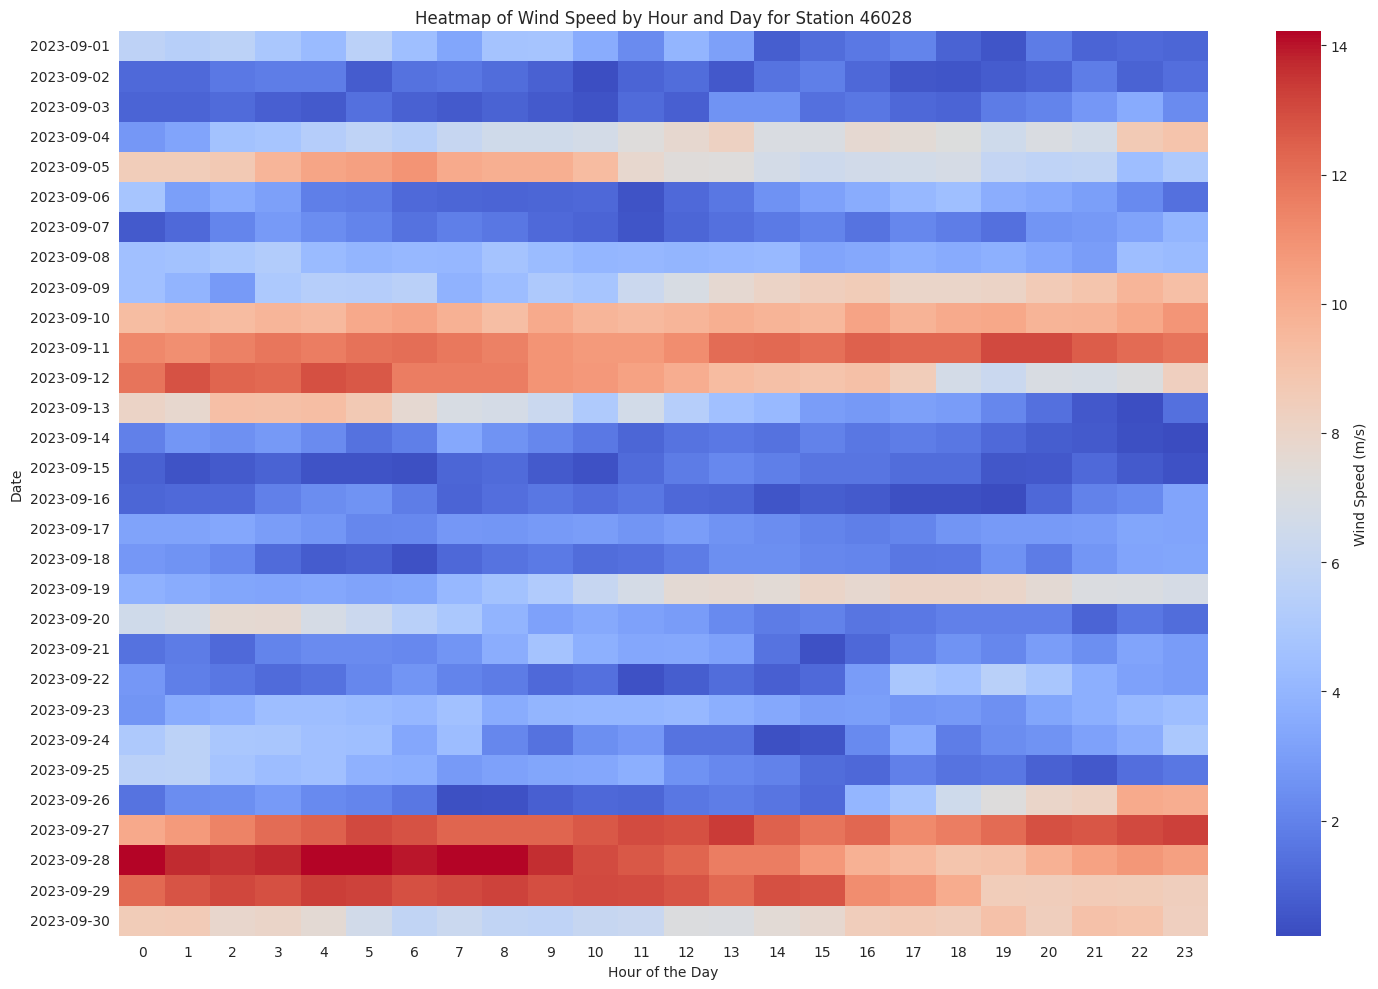

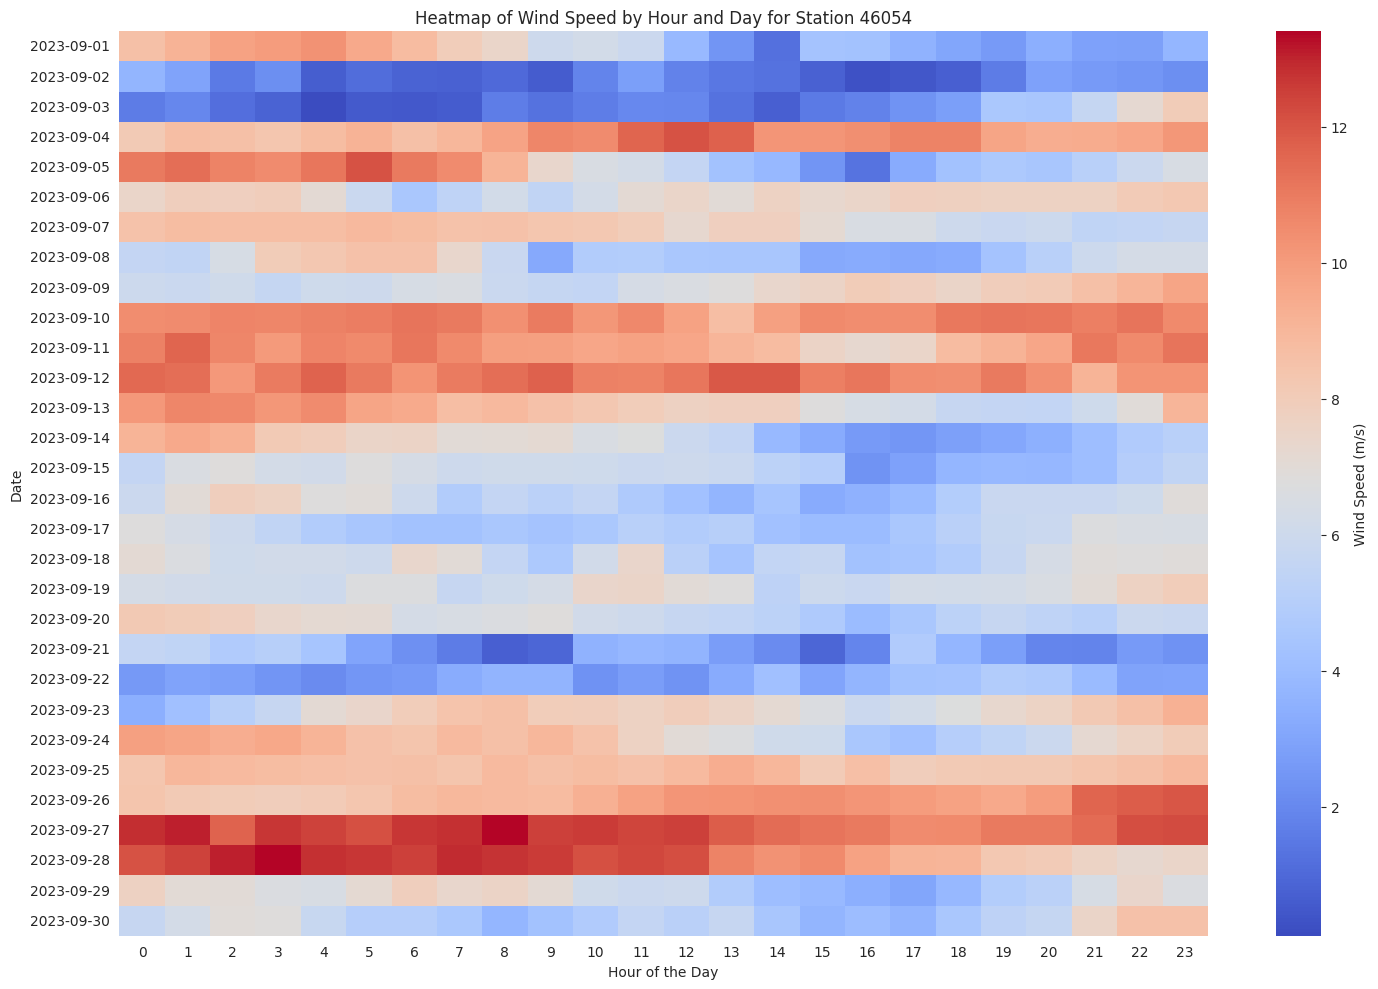

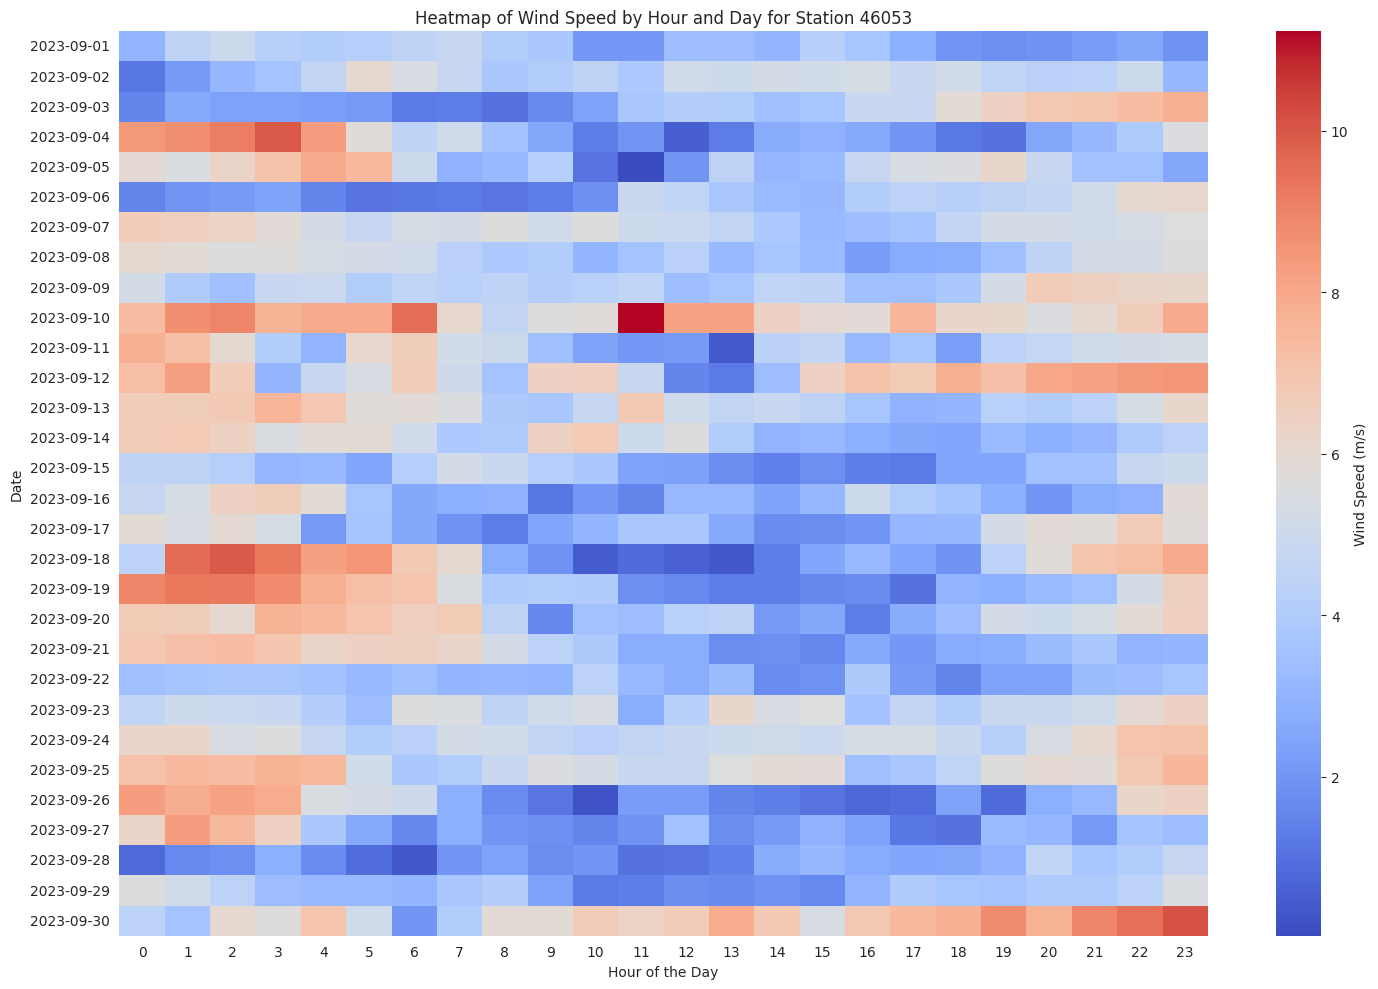

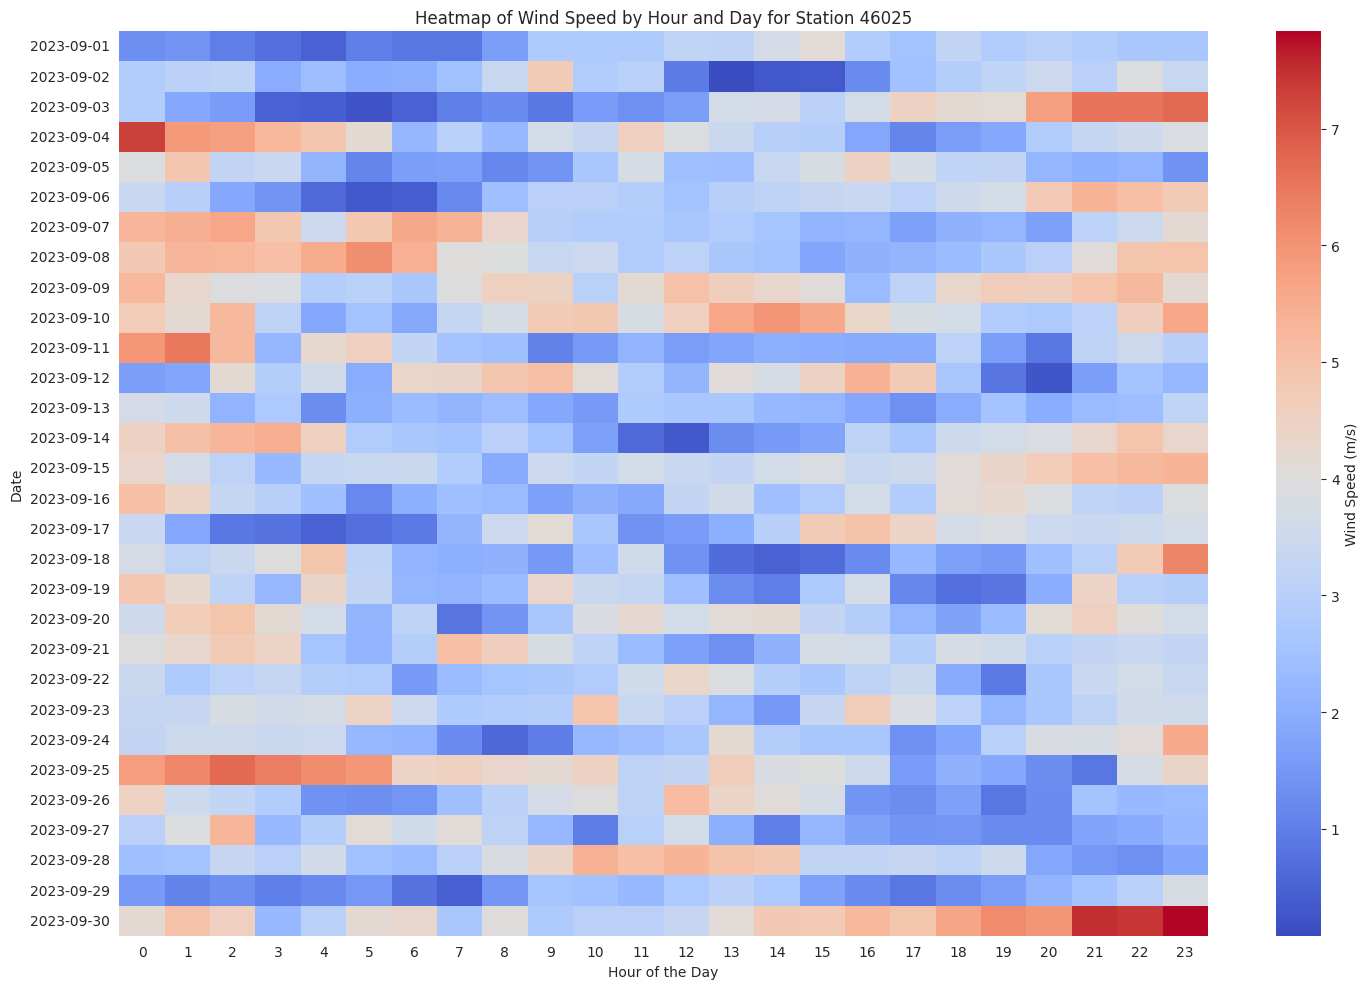

In [ ]:
# Create a pivot table with hours as columns and days as rows
# For each unique station, we'll create a heatmap
for station in unique_stations:
    station_data = df_buoy[df_buoy['Station_ID'] == station]
    pivot_table = station_data.pivot_table(index=station_data['Timestamp'].dt.date,
                                           columns=station_data['Timestamp'].dt.hour,
                                           values='Wind_Speed',
                                           aggfunc='mean')

    plt.figure(figsize=(15, 10))
    sns.heatmap(pivot_table, cmap='coolwarm', cbar_kws={'label': 'Wind Speed (m/s)'})
    plt.title(f'Heatmap of Wind Speed by Hour and Day for Station {station}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Date')
    plt.tight_layout()
    plt.show()

## 4. Anomaly Detection

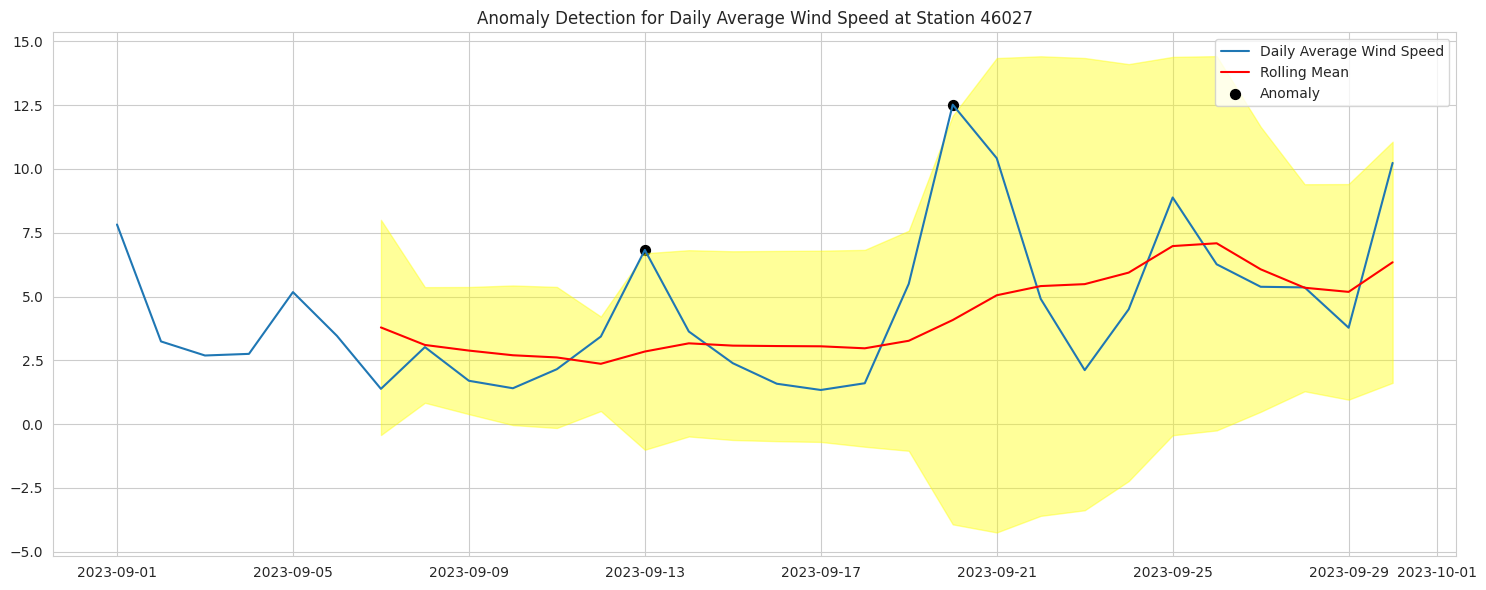

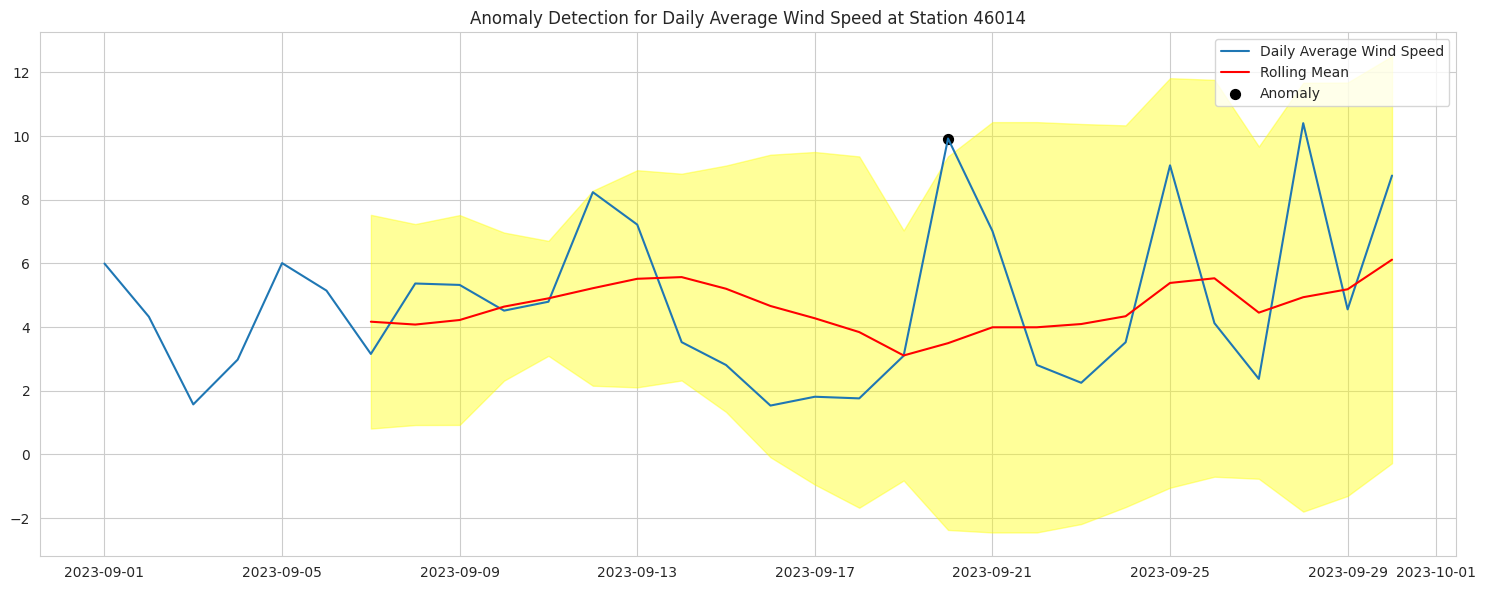

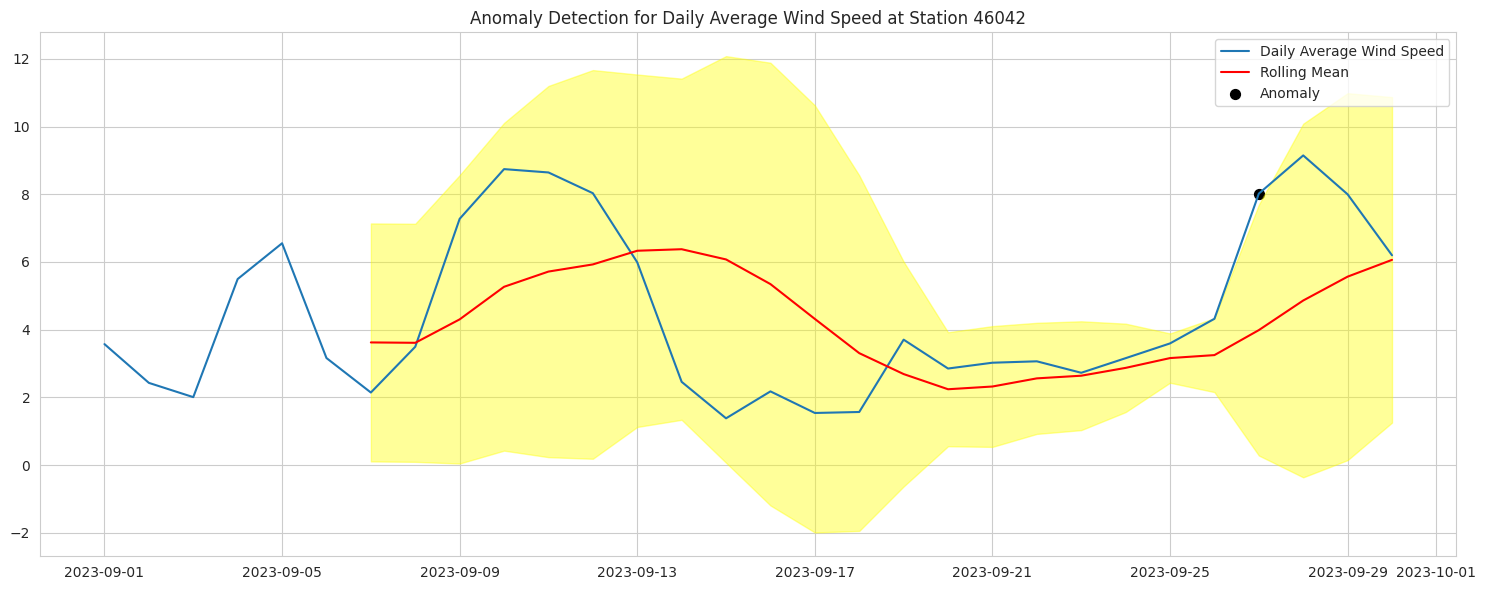

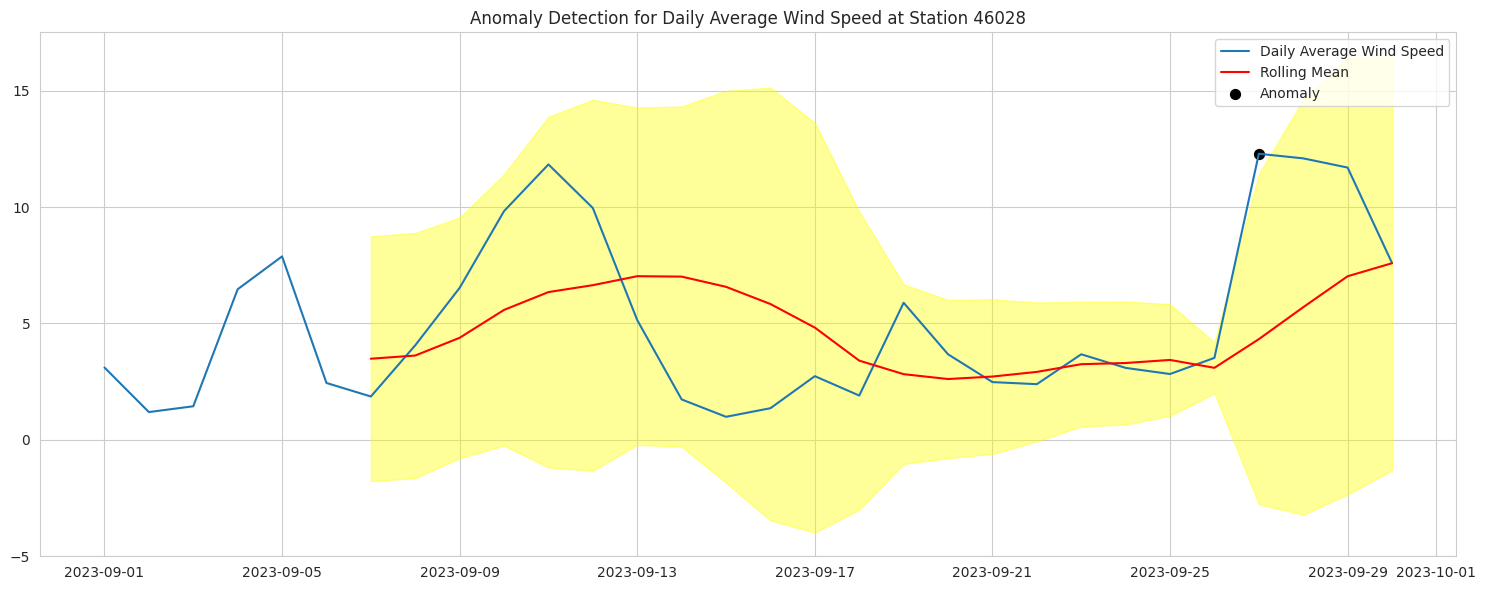

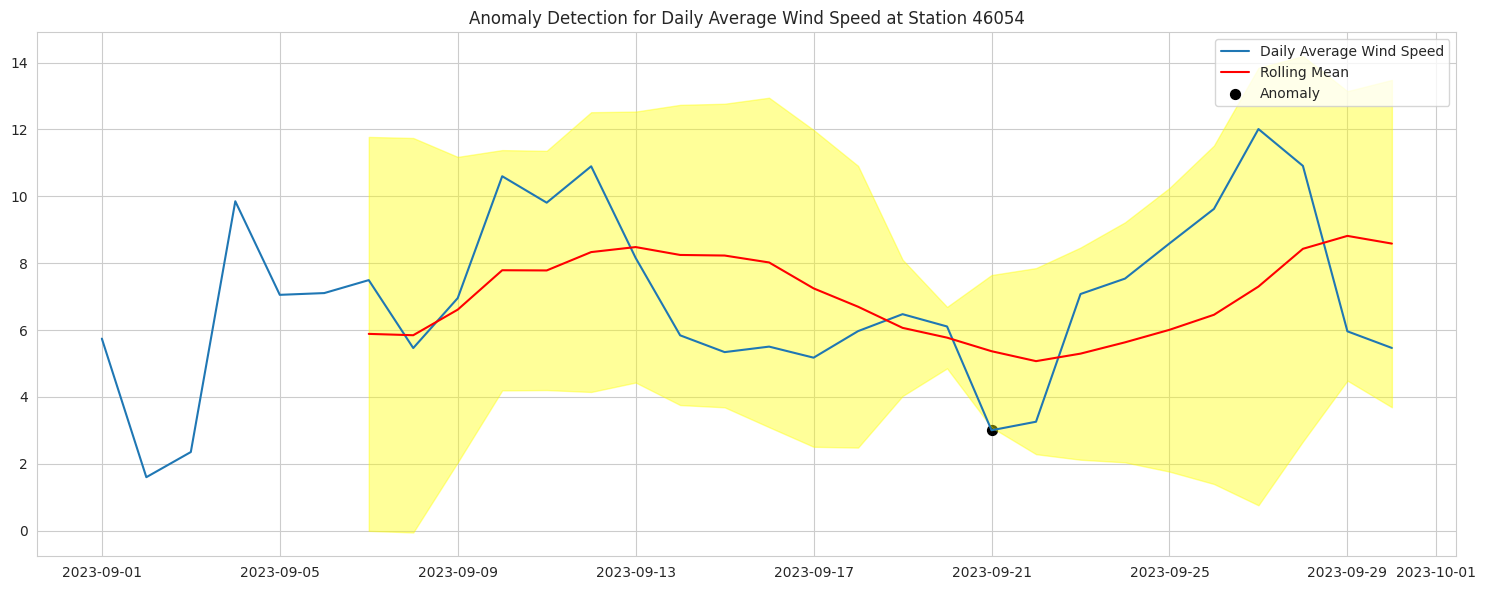

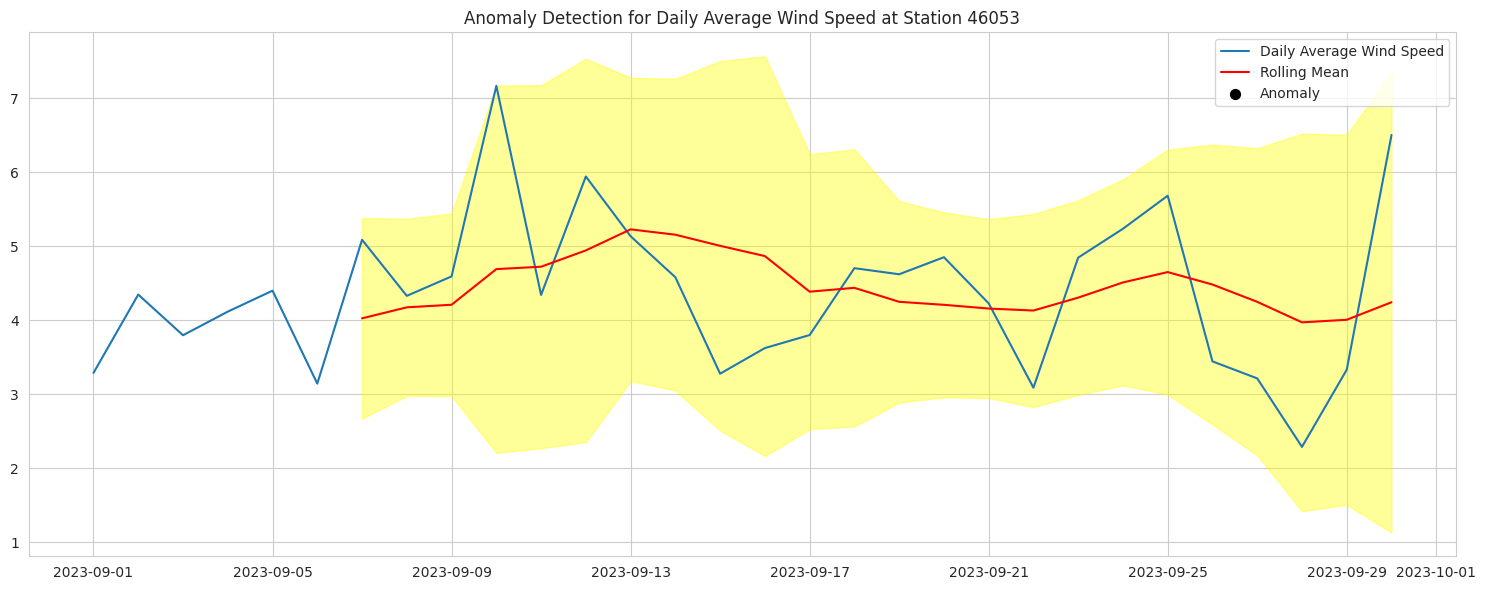

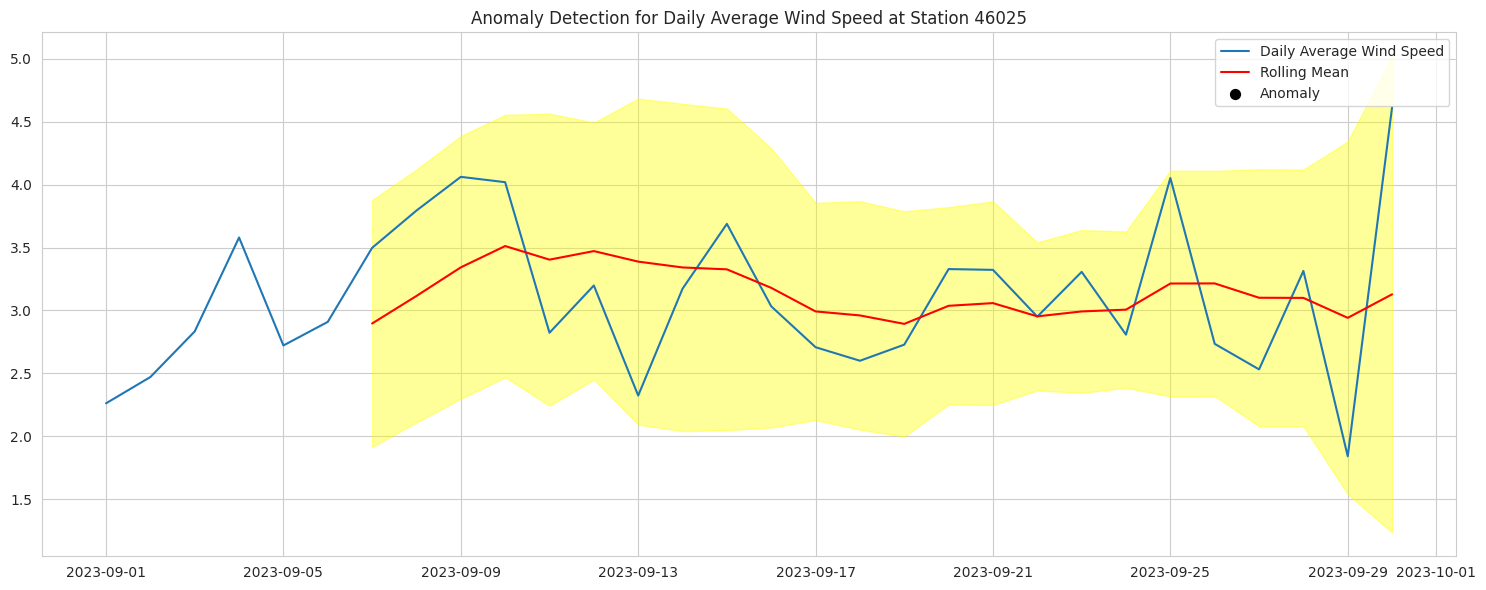

In [ ]:
window_size = 7  # 7 days window

# For each unique station, we'll create an anomaly detection plot
for station in unique_stations:
    station_data = df_buoy[df_buoy['Station_ID'] == station]
    daily_averages = station_data.resample('D', on='Timestamp').mean()

    rolling_mean = daily_averages['Wind_Speed'].rolling(window=window_size).mean()
    rolling_std = daily_averages['Wind_Speed'].rolling(window=window_size).std()

    # Detect anomalies
    anomalies = daily_averages[(daily_averages['Wind_Speed'] > rolling_mean + 2*rolling_std) |
                               (daily_averages['Wind_Speed'] < rolling_mean - 2*rolling_std)]

    # Plot
    plt.figure(figsize=(15, 6))
    plt.plot(daily_averages.index, daily_averages['Wind_Speed'], label='Daily Average Wind Speed')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.scatter(anomalies.index, anomalies['Wind_Speed'], color='k', s=50, label='Anomaly')
    plt.fill_between(daily_averages.index, rolling_mean+2*rolling_std, rolling_mean-2*rolling_std, color='yellow', alpha=0.4)
    plt.title(f'Anomaly Detection for Daily Average Wind Speed at Station {station}')
    plt.legend()
    plt.tight_layout()
    plt.show()

## 5. Trend Analysis

<Figure size 1500x1000 with 0 Axes>

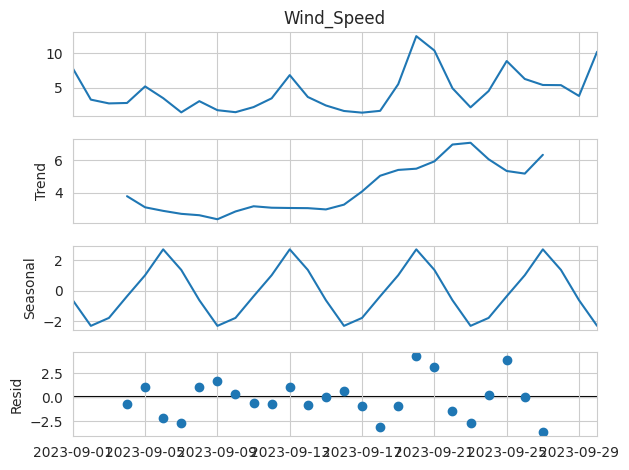

<Figure size 1500x1000 with 0 Axes>

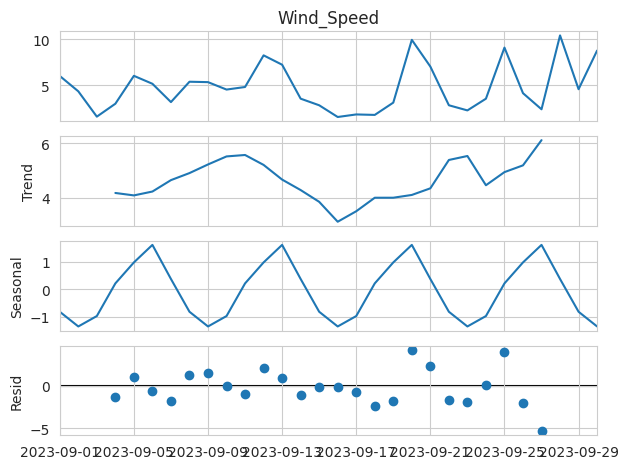

<Figure size 1500x1000 with 0 Axes>

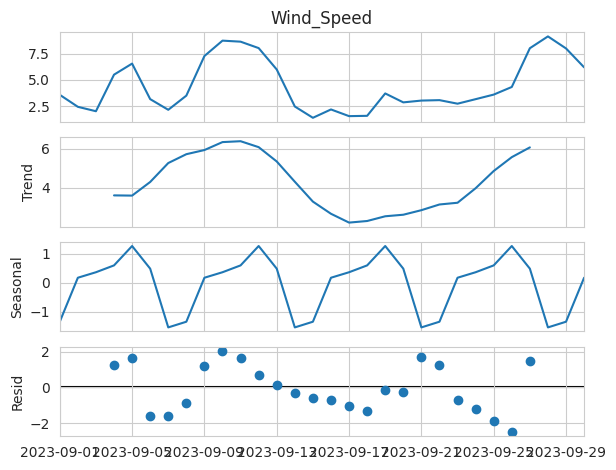

<Figure size 1500x1000 with 0 Axes>

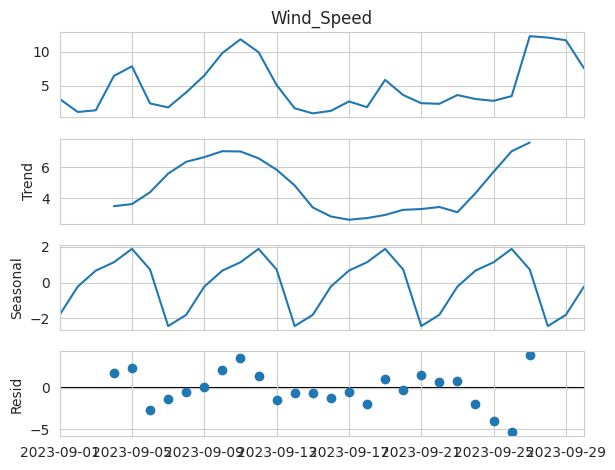

<Figure size 1500x1000 with 0 Axes>

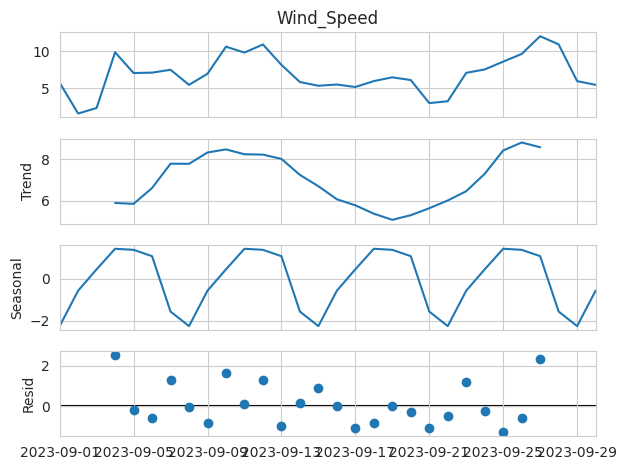

<Figure size 1500x1000 with 0 Axes>

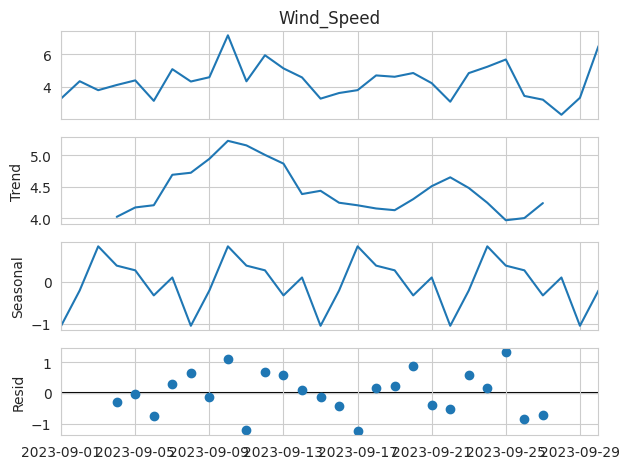

<Figure size 1500x1000 with 0 Axes>

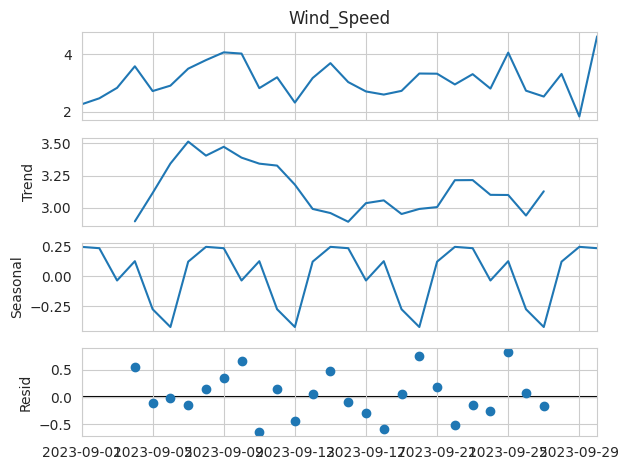

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

for station in unique_stations:
    station_data = df_buoy[df_buoy['Station_ID'] == station]
    daily_averages = station_data.resample('D', on='Timestamp').mean()

    # Decomposing the 'Wind_Speed' column, while interpolating missing values
    decomposition = seasonal_decompose(daily_averages['Wind_Speed'].interpolate(method='linear'), model='additive')

    # Plotting the decomposed components
    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Seasonal Decomposition for Station {station}', fontsize=16)
    decomposition.plot()
    plt.show()

# The Second part is analyzing the wave data for 18 stations.

## 1. Read the dataset


In [ ]:
import pandas as pd

# List of station IDs
station_ids = [46027, 46244, 46213, 46014, 46013, 46026, 46042,
               46239, 46028, 46011, 46218, 46054, 46053, 46251, 46025,
               46258, 46232]

# Initialize an empty dataframe
df = pd.DataFrame()

# Base URL
base_url = "https://www.ndbc.noaa.gov/data/stdmet/Sep/{}.txt"

# Loop through each station ID to fetch the data and append to the main dataframe
for station_id in station_ids:
    url = base_url.format(station_id)
    try:
        # Read data from the URL
        temp_df = pd.read_csv(url, delim_whitespace=True, skiprows=[1])

        # You can add a new column to track the station ID if needed
        temp_df['Station_ID'] = station_id

        # Append the data to the main dataframe
        df = df.append(temp_df, ignore_index=True)
    except:
        print(f"Failed to fetch data for station ID: {station_id}")

# Display the combined dataframe
df

<ipython-input-14-60c7dafbf2e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)
<ipython-input-14-60c7dafbf2e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)
<ipython-input-14-60c7dafbf2e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)
<ipython-input-14-60c7dafbf2e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)
<ipython-input-14-60c7dafbf2e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

#YY  MM  DD  hh  mm  WDIR  WSPD   GST   WVHT    DPD    APD  MWD  \
0      2023   9   1   0   0   317   2.1   2.8  99.00  99.00  99.00  999   
1      2023   9   1   0  10   309   2.4   3.3   1.16   8.33   5.54  277   
2      2023   9   1   0  20   304   2.6   3.3  99.00  99.00  99.00  999   
3      2023   9   1   0  30   303   2.0   2.9  99.00  99.00  99.00  999   
4      2023   9   1   0  40   303   1.3   2.0   1.35   7.14   5.93  289   
...     ...  ..  ..  ..  ..   ...   ...   ...    ...    ...    ...  ...   
53207  2023   9  30  21  56   999  99.0  99.0   1.01  10.53   5.59  239   
53208  2023   9  30  22  26   999  99.0  99.0   0.98   9.88   5.83  246   
53209  2023   9  30  22  56   999  99.0  99.0   0.97  10.53   5.32  259   
53210  2023   9  30  23  26   999  99.0  99.0   0.95  11.76   5.69  192   
53211  2023   9  30  23  56   999  99.0  99.0   0.95  11.11   5.81  242   

         PRES   ATMP   WTMP   DEWP   VIS  TIDE  Station_ID  
0      1010.6   14.3   12.0  999.0  99.0  99.0       46027  
1      1010.6   14.2   11.9  999.0  99.0  99.0       46027  
2      1010.5   14.3   11.9  999.0  99.0  99.0       46027  
3      1010.4   14.5   11.9  999.0  99.0  99.0       46027  
4      1010.5   14.7   11.9  999.0  99.0  99.0       46027  
...       ...    ...    ...    ...   ...   ...         ...  
53207  9999.0  999.0  999.0  999.0  99.0  99.0       46232  
53208  9999.0  999.0  999.0  999.0  99.0  99.0       46232  
53209  9999.0  999.0  999.0  999.0  99.0  99.0       46232  
53210  9999.0  999.0  999.0  999.0  99.0  99.0       46232  
53211  9999.0  999.0  999.0  999.0  99.0  99.0       46232  

[53212 rows x 19 columns]

In [ ]:
# Drop the specified columns
cols_to_drop = ['WDIR', 'WSPD', 'GST', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']
df = df.drop(columns=cols_to_drop)

print(df)

        #YY  MM  DD  hh  mm   WVHT    DPD    APD  MWD  Station_ID
0      2023   9   1   0   0  99.00  99.00  99.00  999       46027
1      2023   9   1   0  10   1.16   8.33   5.54  277       46027
2      2023   9   1   0  20  99.00  99.00  99.00  999       46027
3      2023   9   1   0  30  99.00  99.00  99.00  999       46027
4      2023   9   1   0  40   1.35   7.14   5.93  289       46027
...     ...  ..  ..  ..  ..    ...    ...    ...  ...         ...
53207  2023   9  30  21  56   1.01  10.53   5.59  239       46232
53208  2023   9  30  22  26   0.98   9.88   5.83  246       46232
53209  2023   9  30  22  56   0.97  10.53   5.32  259       46232
53210  2023   9  30  23  26   0.95  11.76   5.69  192       46232
53211  2023   9  30  23  56   0.95  11.11   5.81  242       46232

[53212 rows x 10 columns]


In [ ]:
missing_patterns = [99.00, 999, 999.0, 99.0]

for column in df.columns:
    for pattern in missing_patterns:
        df[column] = df[column].replace(to_replace=pattern, value=np.nan, regex=True)

missing_data = df.isnull().sum()
print(missing_data)

#YY               0
MM                0
DD                0
hh                0
mm                0
WVHT          28834
DPD           28834
APD           28834
MWD           28834
Station_ID        0
dtype: int64


In [ ]:
# Drop rows with any missing values
df.dropna(axis=0, inplace=True)

df

#YY  MM  DD  hh  mm  WVHT    DPD   APD    MWD  Station_ID
1      2023   9   1   0  10  1.16   8.33  5.54  277.0       46027
4      2023   9   1   0  40  1.35   7.14  5.93  289.0       46027
7      2023   9   1   1  10  1.18   7.14  5.88  286.0       46027
10     2023   9   1   1  40  1.17   7.69  5.66  275.0       46027
13     2023   9   1   2  10  1.13   7.14  5.23  283.0       46027
...     ...  ..  ..  ..  ..   ...    ...   ...    ...         ...
53207  2023   9  30  21  56  1.01  10.53  5.59  239.0       46232
53208  2023   9  30  22  26  0.98   9.88  5.83  246.0       46232
53209  2023   9  30  22  56  0.97  10.53  5.32  259.0       46232
53210  2023   9  30  23  26  0.95  11.76  5.69  192.0       46232
53211  2023   9  30  23  56  0.95  11.11  5.81  242.0       46232

[24378 rows x 10 columns]

In [ ]:
unique_stations = df['Station_ID'].unique()
unique_stations

array([46027, 46244, 46213, 46014, 46013, 46026, 46042, 46239, 46028,
       46011, 46218, 46054, 46053, 46251, 46025, 46258, 46232])

In [ ]:
# Rename columns based on provided descriptions
df.rename(columns={
    '#YY': 'Year',
    'MM': 'Month',
    'DD': 'Day',
    'hh': 'Hour',
    'mm': 'Minute',
    'WVHT': 'Wave_Height',
    'DPD': 'Dominant_Wave_Period',
    'APD': 'Average_Wave_Period',
    'MWD': 'Dominant_Wave_Direction',
}, inplace=True)

df

Year  Month  Day  Hour  Minute  Wave_Height  Dominant_Wave_Period  \
1      2023      9    1     0      10         1.16                  8.33   
4      2023      9    1     0      40         1.35                  7.14   
7      2023      9    1     1      10         1.18                  7.14   
10     2023      9    1     1      40         1.17                  7.69   
13     2023      9    1     2      10         1.13                  7.14   
...     ...    ...  ...   ...     ...          ...                   ...   
53207  2023      9   30    21      56         1.01                 10.53   
53208  2023      9   30    22      26         0.98                  9.88   
53209  2023      9   30    22      56         0.97                 10.53   
53210  2023      9   30    23      26         0.95                 11.76   
53211  2023      9   30    23      56         0.95                 11.11   

       Average_Wave_Period  Dominant_Wave_Direction  Station_ID  
1                     5.54                    277.0       46027  
4                     5.93                    289.0       46027  
7                     5.88                    286.0       46027  
10                    5.66                    275.0       46027  
13                    5.23                    283.0       46027  
...                    ...                      ...         ...  
53207                 5.59                    239.0       46232  
53208                 5.83                    246.0       46232  
53209                 5.32                    259.0       46232  
53210                 5.69                    192.0       46232  
53211                 5.81                    242.0       46232  

[24378 rows x 10 columns]

In [ ]:
# Creating a unified timestamp column
df['Timestamp'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df.head()

Year  Month  Day  Hour  Minute  Wave_Height  Dominant_Wave_Period  \
1   2023      9    1     0      10         1.16                  8.33   
4   2023      9    1     0      40         1.35                  7.14   
7   2023      9    1     1      10         1.18                  7.14   
10  2023      9    1     1      40         1.17                  7.69   
13  2023      9    1     2      10         1.13                  7.14   

    Average_Wave_Period  Dominant_Wave_Direction  Station_ID  \
1                  5.54                    277.0       46027   
4                  5.93                    289.0       46027   
7                  5.88                    286.0       46027   
10                 5.66                    275.0       46027   
13                 5.23                    283.0       46027   

             Timestamp  
1  2023-09-01 00:10:00  
4  2023-09-01 00:40:00  
7  2023-09-01 01:10:00  
10 2023-09-01 01:40:00  
13 2023-09-01 02:10:00

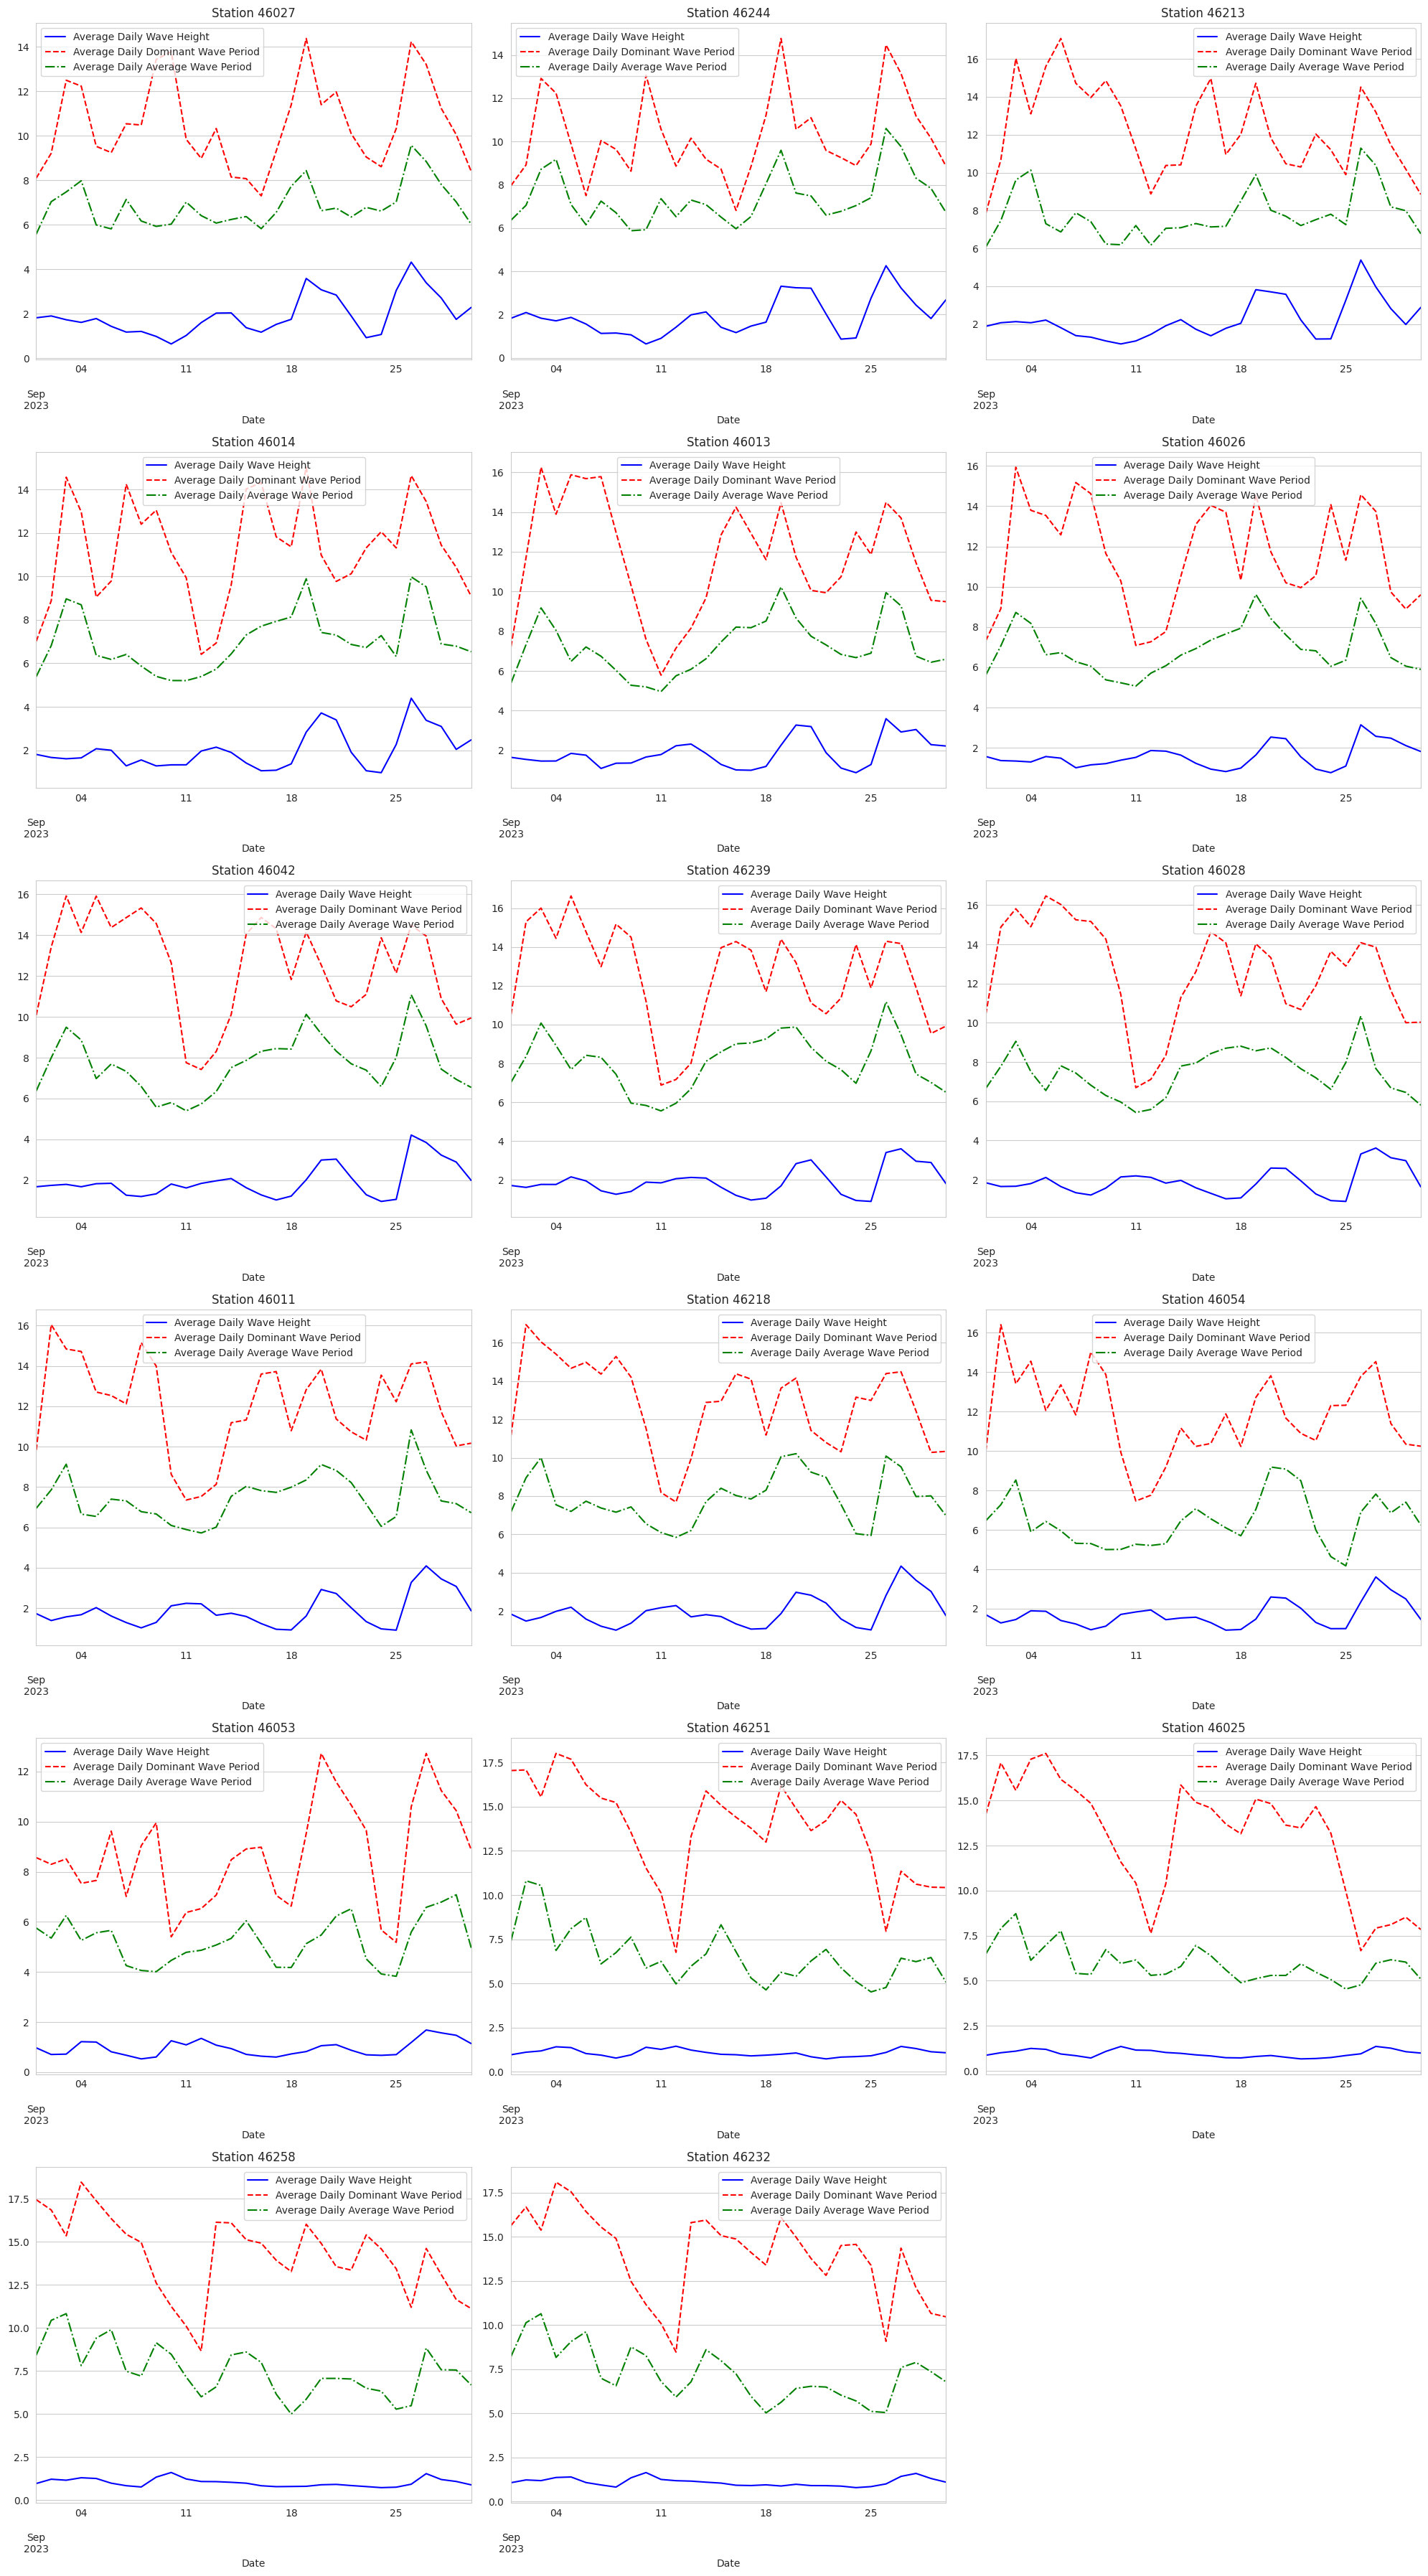

In [ ]:
# Assuming the cleaned data is named df_cleaned
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
unique_stations = df['Station_ID'].unique()

# Settings
sns.set_style("whitegrid")
stations_per_row = 3
num_rows = int(np.ceil(len(unique_stations) / stations_per_row))

fig, axs = plt.subplots(num_rows, stations_per_row, figsize=(20, 6 * num_rows))

for idx, station in enumerate(unique_stations):
    row = idx // stations_per_row
    col = idx % stations_per_row

    # Handling the subplot axis for single and multiple rows
    if num_rows > 1:
        ax = axs[row, col]
    else:
        ax = axs[col]

    station_data = df[df['Station_ID'] == station]
    daily_averages = station_data.resample('D', on='Timestamp').mean()

    daily_averages['Wave_Height'].plot(ax=ax, label='Average Daily Wave Height', color='blue')
    daily_averages['Dominant_Wave_Period'].plot(ax=ax, label='Average Daily Dominant Wave Period', color='red', linestyle='--')
    daily_averages['Average_Wave_Period'].plot(ax=ax, label='Average Daily Average Wave Period', color='green', linestyle='-.')

    ax.set_title(f'Station {station}')
    ax.set_xlabel('Date')
    ax.legend()

# Removing any unused subplots
if len(unique_stations) % stations_per_row != 0:
    for j in range(len(unique_stations) % stations_per_row, stations_per_row):
        fig.delaxes(axs[num_rows-1, j])

plt.tight_layout()
plt.show()

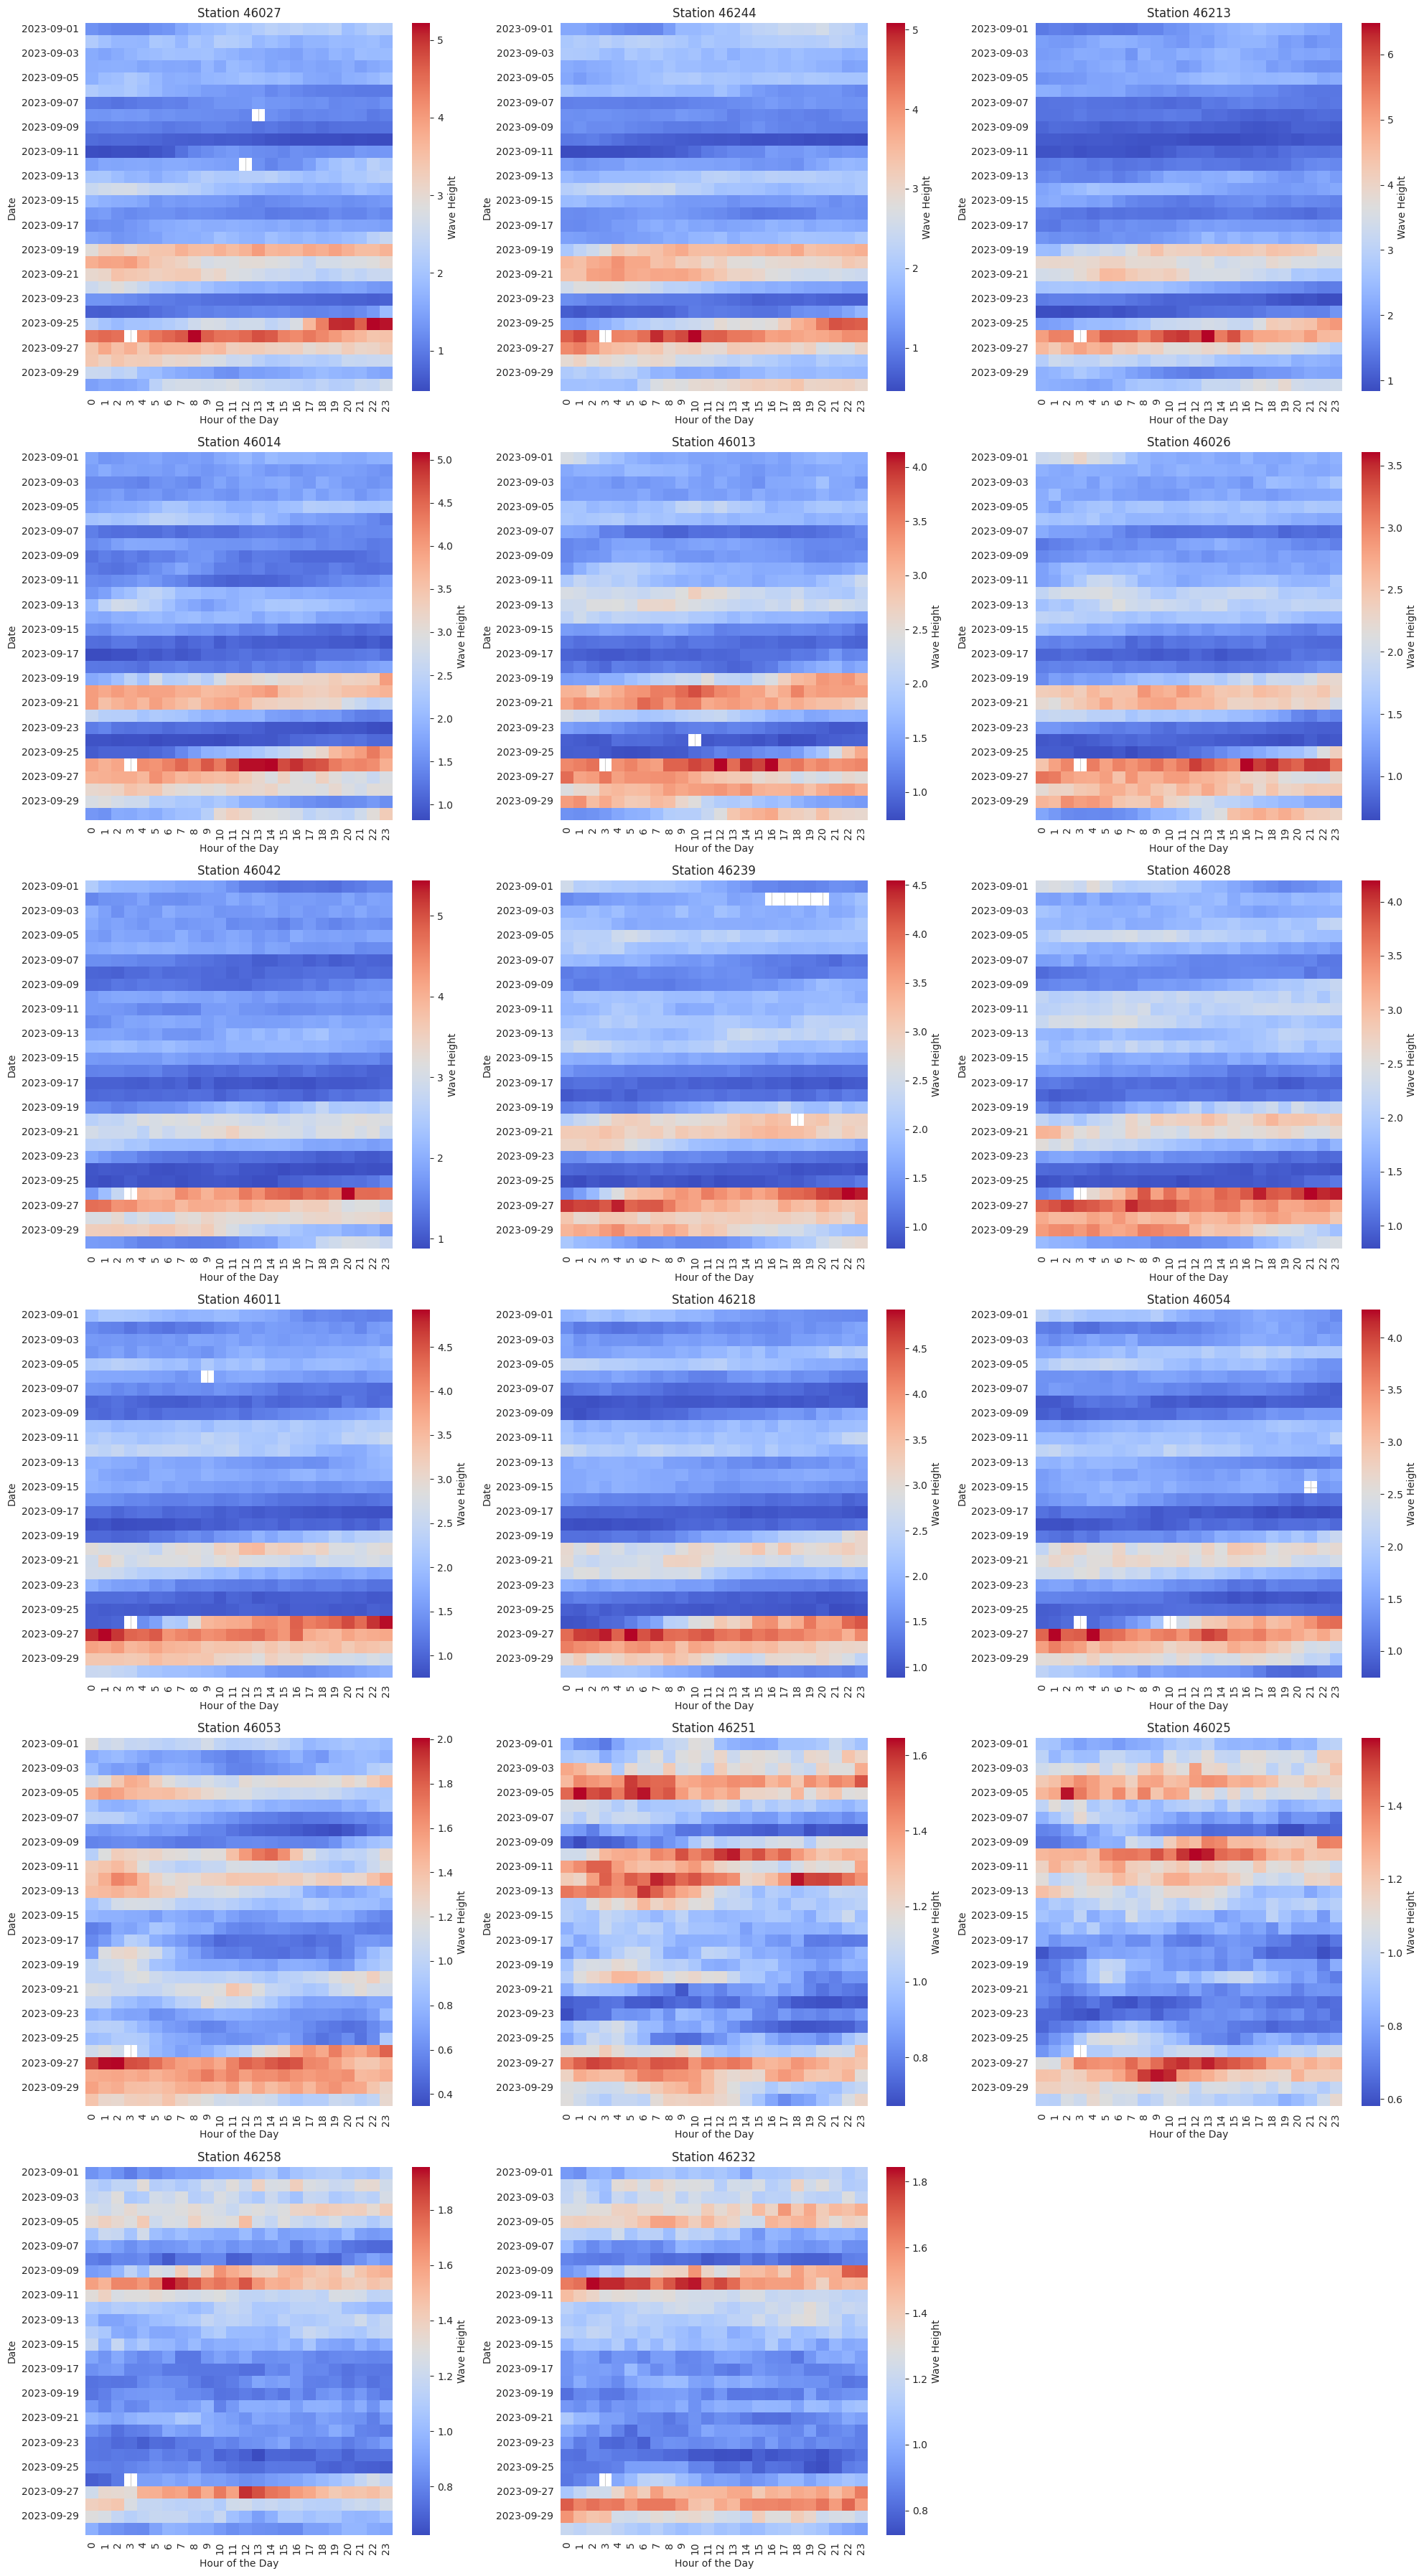

In [ ]:
sns.set_style("whitegrid")
stations_per_row = 3
num_rows = int(np.ceil(len(unique_stations) / stations_per_row))

fig, axs = plt.subplots(num_rows, stations_per_row, figsize=(20, 6 * num_rows))

for idx, station in enumerate(unique_stations):
    row = idx // stations_per_row
    col = idx % stations_per_row

    # Handling the subplot axis for single and multiple rows
    if num_rows > 1:
        ax = axs[row, col]
    else:
        ax = axs[col]

    station_data = df[df['Station_ID'] == station]

    pivot_table = station_data.pivot_table(index=station_data['Timestamp'].dt.date,
                                           columns=station_data['Timestamp'].dt.hour,
                                           values='Wave_Height',
                                           aggfunc='mean')

    sns.heatmap(pivot_table, ax=ax, cmap='coolwarm', cbar_kws={'label': 'Wave Height'})
    ax.set_title(f'Station {station}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Date')

# Removing any unused subplots
if len(unique_stations) % stations_per_row != 0:
    for j in range(len(unique_stations) % stations_per_row, stations_per_row):
        fig.delaxes(axs[num_rows-1, j])

plt.tight_layout()
plt.show()

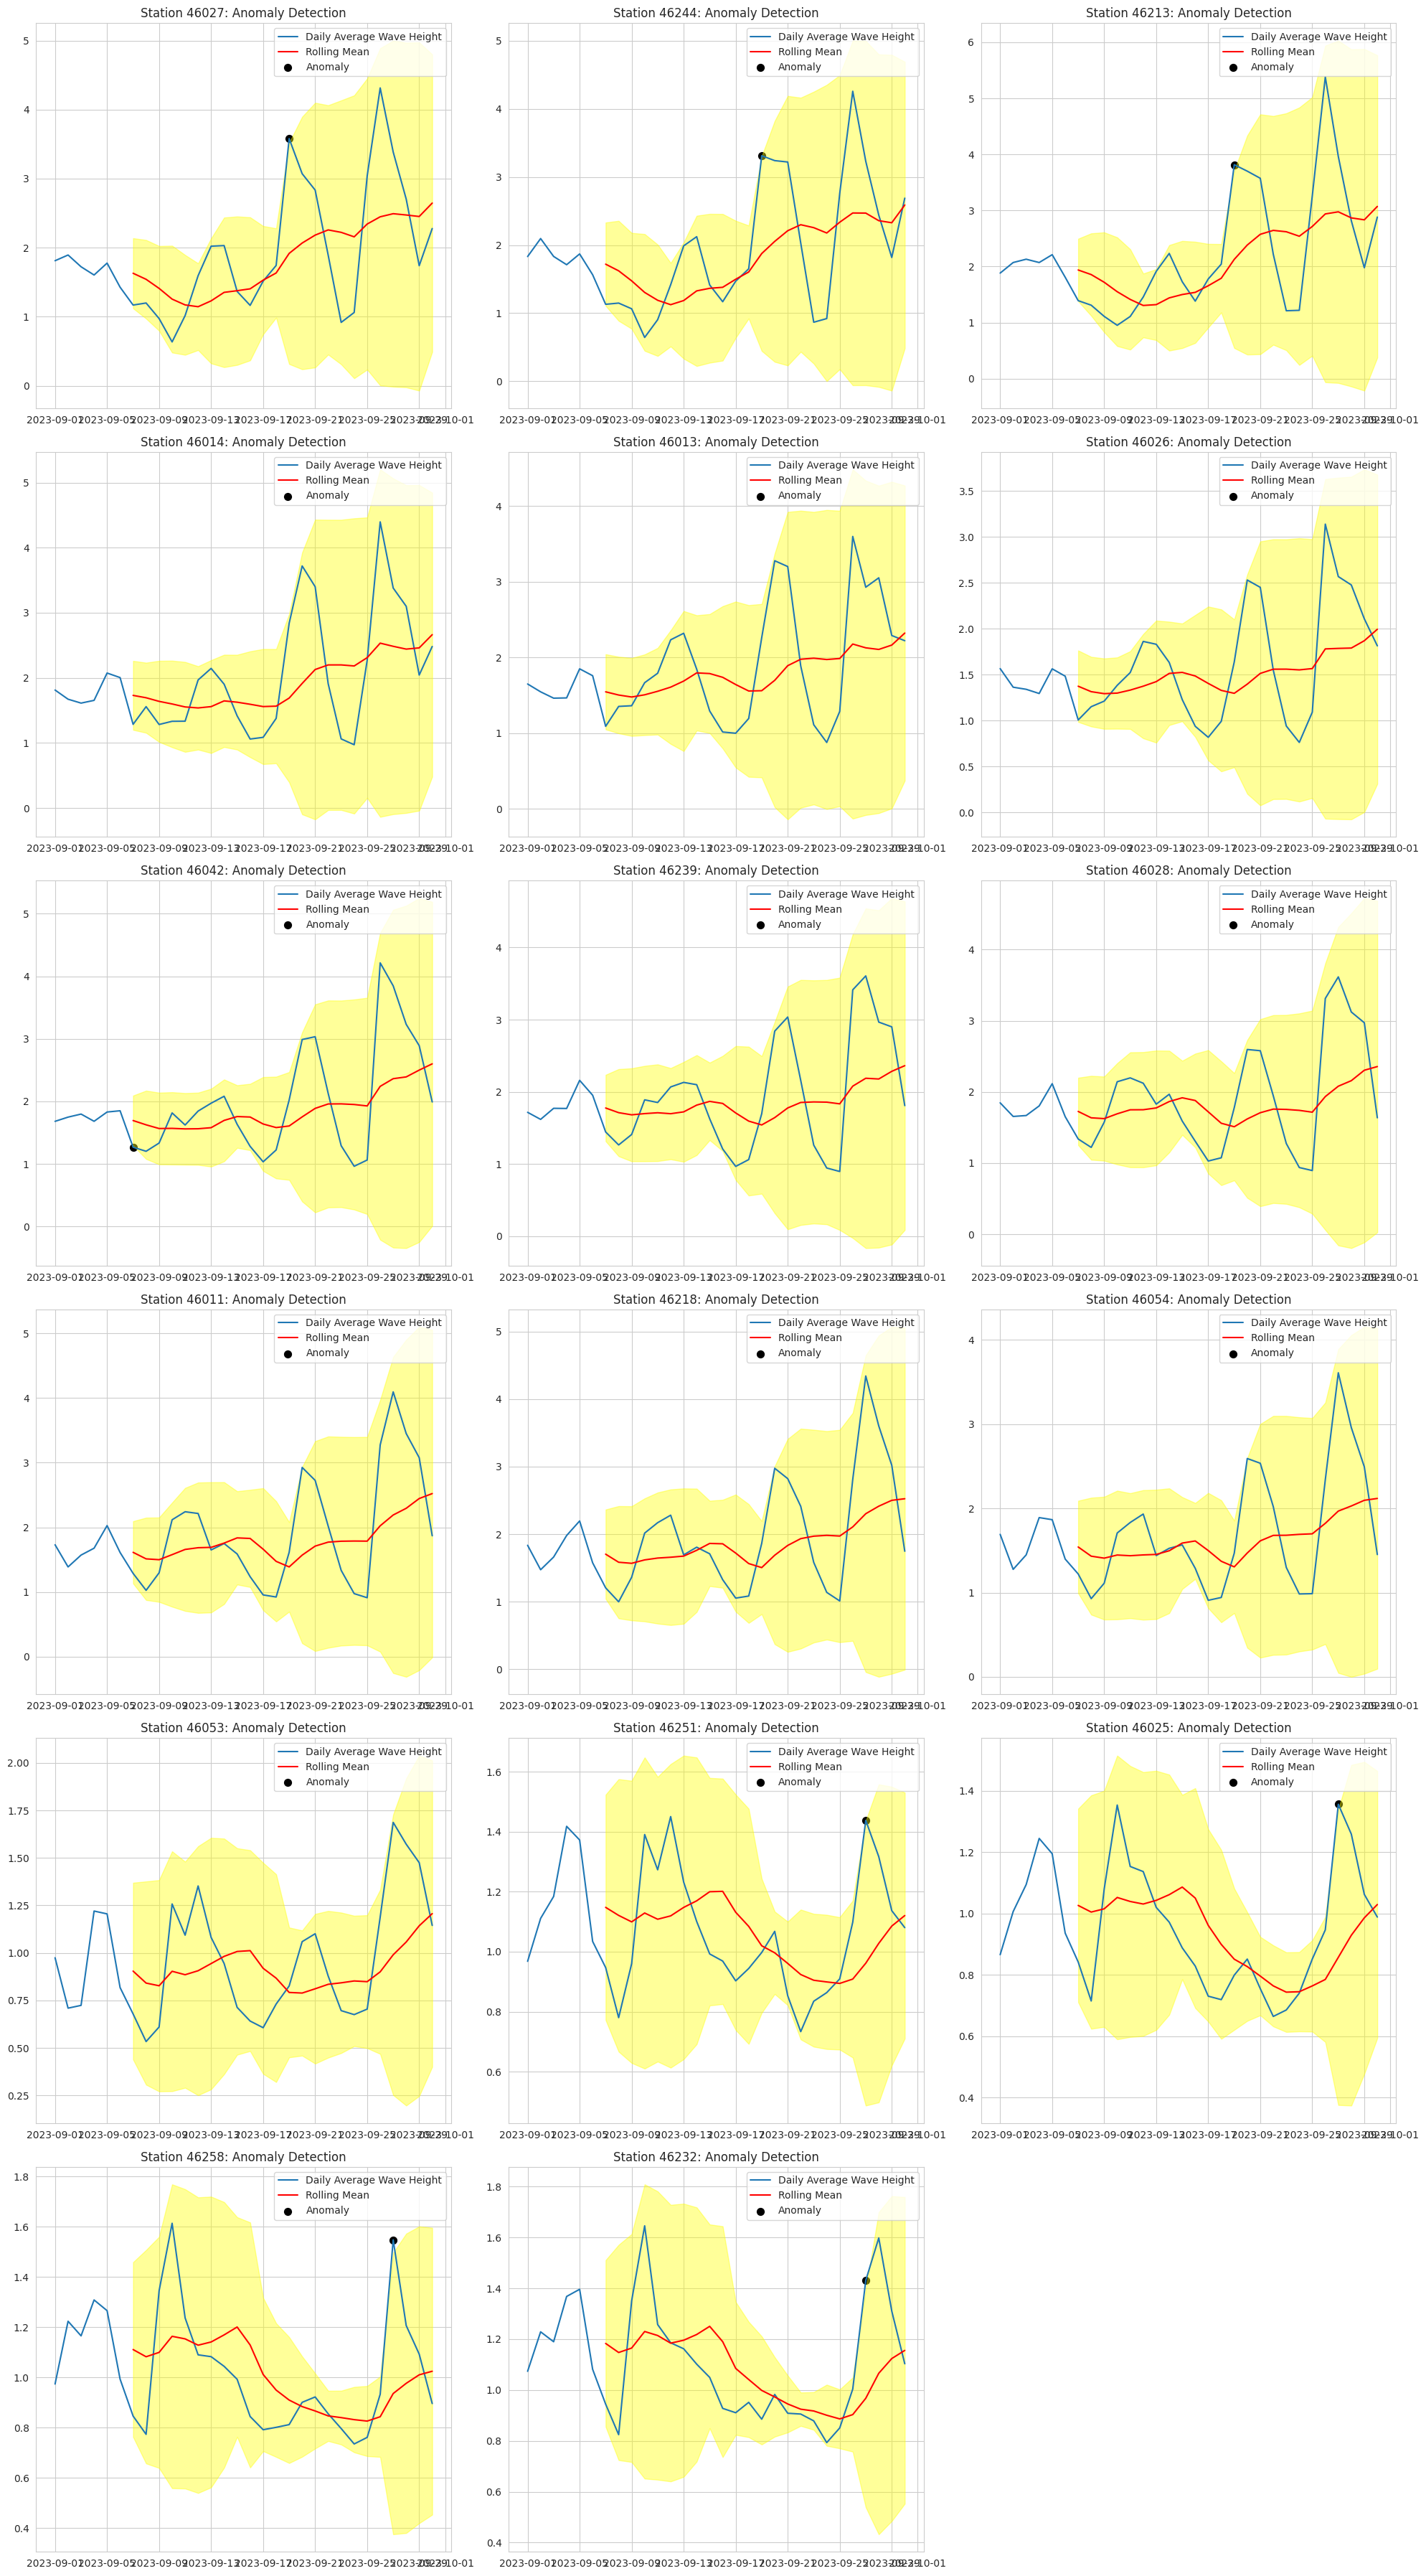

In [ ]:
# Settings
window_size = 7  # 7 days window for rolling stats
stations_per_row = 3
num_rows = int(np.ceil(len(unique_stations) / stations_per_row))

fig, axs = plt.subplots(num_rows, stations_per_row, figsize=(20, 6 * num_rows))

for idx, station in enumerate(unique_stations):
    row = idx // stations_per_row
    col = idx % stations_per_row

    # Handling the subplot axis for single and multiple rows
    if num_rows > 1:
        ax = axs[row, col]
    else:
        ax = axs[col]

    station_data = df[df['Station_ID'] == station]
    daily_averages = station_data.resample('D', on='Timestamp').mean()

    # Calculate rolling mean and std
    rolling_mean = daily_averages['Wave_Height'].rolling(window=window_size).mean()
    rolling_std = daily_averages['Wave_Height'].rolling(window=window_size).std()

    # Detect anomalies
    anomalies = daily_averages[(daily_averages['Wave_Height'] > rolling_mean + 2*rolling_std) |
                               (daily_averages['Wave_Height'] < rolling_mean - 2*rolling_std)]

    # Plotting
    ax.plot(daily_averages.index, daily_averages['Wave_Height'], label='Daily Average Wave Height')
    ax.plot(rolling_mean, color='red', label='Rolling Mean')
    ax.scatter(anomalies.index, anomalies['Wave_Height'], color='k', s=50, label='Anomaly')
    ax.fill_between(daily_averages.index, rolling_mean+2*rolling_std, rolling_mean-2*rolling_std, color='yellow', alpha=0.4)
    ax.set_title(f'Station {station}: Anomaly Detection')
    ax.legend()

# Removing any unused subplots
if len(unique_stations) % stations_per_row != 0:
    for j in range(len(unique_stations) % stations_per_row, stations_per_row):
        fig.delaxes(axs[num_rows-1, j])

plt.tight_layout()
plt.show()